# Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style="darkgrid")

In [2]:
# import dataset and inspect first fice rows and shape
df = pd.read_csv('data/top_agencies_clean.csv')

display(df.head())
df.shape

Unnamed: 0         created_date          closed_date agency  \
0           0  2017-07-09 23:26:34  2017-07-10 01:55:52   NYPD   
1           1  2017-07-09 23:11:08  2017-07-10 07:36:59   NYPD   
2           2  2017-07-09 23:15:39  2017-07-10 03:14:15   NYPD   
3           3  2017-07-09 20:12:26  2017-07-09 20:33:15   NYPD   
4           4  2017-07-09 13:31:16  2017-07-09 17:44:29   NYPD   

                       agency_name       complaint_type        descriptor  \
0  New York City Police Department  Noise - Residential  Loud Music/Party   
1  New York City Police Department  Noise - Residential  Loud Music/Party   
2  New York City Police Department  Noise - Residential  Loud Music/Party   
3  New York City Police Department  Noise - Residential      Loud Talking   
4  New York City Police Department  Noise - Residential      Loud Talking   

                location_type address_type  status  \
0  Residential Building/House      ADDRESS  Closed   
1  Residential Building/House      ADDRESS  Closed   
2  Residential Building/House      ADDRESS  Closed   
3  Residential Building/House      ADDRESS  Closed   
4  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

   new_zip                                       Unnamed: 0.1  \
0    11203  ZCTA5 11203: Summary level: 860, zip code tabu...   
1    10469  ZCTA5 10469: Summary level: 860, zip code tabu...   
2    10458  ZCTA5 10458: Summary level: 860, zip code tabu...   
3    10031  ZCTA5 10031: Summary level: 860, zip code tabu...   
4    11377  ZCTA5 11377: Summary level: 860, zip code tabu...   

   total_population  median_income  median_age  minority_rep  hs_or_above  \
0             75451          30301        39.8      0.961816     0.786099   
1             73870          29338        40.2      0.892961     0.705336   
2             83960          17907        29.0      0.916687     0.614682   
3             60254          25155        34.2      0.825987     0.699188   
4             86421          30227        40.0      0.790479     0.703111   

   bach_or_above  poverty_rate  unemployment_rate  
0       0.234683      0.147213           0.064832  
1       0.249883      0.134557           0.087722  
2       0.143008      0.313134           0.132113  
3       0.359176      0.210074           0.068703  
4       0.286637      0.107048           0.040060

(15492091, 25)

In [3]:
# there are a few columns that we know we don't need and can drop now
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'agency_name'])

In [4]:
# check the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492091 entries, 0 to 15492090
Data columns (total 22 columns):
created_date              object
closed_date               object
agency                    object
complaint_type            object
descriptor                object
location_type             object
address_type              object
status                    object
resolution_description    object
community_board           object
borough                   object
open_data_channel_type    object
location                  object
new_zip                   int64
total_population          int64
median_income             int64
median_age                float64
minority_rep              float64
hs_or_above               float64
bach_or_above             float64
poverty_rate              float64
unemployment_rate         float64
dtypes: float64(6), int64(3), object(13)
memory usage: 2.5+ GB


## Convert data types

In [5]:
# convert dates to datetime and zip codes into strings
df.created_date = pd.to_datetime(df.created_date)
df.closed_date = pd.to_datetime(df.closed_date)
df.new_zip = df.new_zip.astype('str')

# New Variables

## Additional Date Variables

In [6]:
#extract individual date values that we'll want to work with for eas of use

df['created_day_o_wk'] = df.created_date.dt.dayofweek
df['created_month'] = df.created_date.dt.month
df['created_day_o_yr'] = df.created_date.dt.dayofyear
df['created_yr'] = df.created_date.dt.year
df['created_time'] = df.created_date.dt.time
df['created_hr'] = df.created_date.dt.hour
df['created_date_only'] = df.created_date.dt.date

df.head()

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD  Noise - Residential   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD  Noise - Residential   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
2  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
3      Loud Talking  Residential Building/House      ADDRESS  Closed   
4      Loud Talking  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr created_date_only  
0          23        2017-07-09  
1          23        2017-07-09  
2          23        2017-07-09  
3          20        2017-07-09  
4          13        2017-07-09

## Adding Response Time

In [7]:
# calculate the response time in days
df['response_time'] = df.closed_date - df.created_date
df['response_time'] = df['response_time'] / np.timedelta64(1,'D')

# remove the records with invalid response times (less that zero)
df = df[df['response_time'] > 0]

df.head()

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD  Noise - Residential   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD  Noise - Residential   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
2  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
3      Loud Talking  Residential Building/House      ADDRESS  Closed   
4      Loud Talking  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr created_date_only  response_time  
0          23        2017-07-09       0.103681  
1          23        2017-07-09       0.351285  
2          23        2017-07-09       0.165694  
3          20        2017-07-09       0.014456  
4          13        2017-07-09       0.175845

## Populations 

It will be useful to calculate or store the populations for some of our geographic areas and save those for later

In [8]:
# create a list of unique borough values and remove the last value 'Unspecified' 
boroughs = sorted(list(df.borough.unique()))
boroughs.pop()

boro_pops = {}

# check to see if there are an equal number of unique zip code and population values for each borough
# if that is true - add the unique population values to get the total populaiton for each borough 
# and add them to a dict
for b in boroughs:
    boro_zip_count = len(df[df['borough'] == b].new_zip.unique())
    boro_pop_count = len(df[df['borough'] == b].total_population.unique())
    
    if boro_zip_count == boro_pop_count:
        print(f'{b} has the same amount of unique zips and pops')
        
        boro_pops[b] = df[df['borough'] == b].total_population.unique().sum()
    else:
        print(f'{b} has differnt values, look into it more')
    
boro_pops

BRONX has the same amount of unique zips and pops
BROOKLYN has the same amount of unique zips and pops
MANHATTAN has the same amount of unique zips and pops
QUEENS has the same amount of unique zips and pops
STATEN ISLAND has the same amount of unique zips and pops


{'BRONX': 1517638,
 'BROOKLYN': 2804810,
 'MANHATTAN': 1755849,
 'QUEENS': 2776307,
 'STATEN ISLAND': 474101}

In [9]:
zip_pops = df.groupby('new_zip').total_population.mean()
zip_pops

new_zip
10001     22924
10002     74993
10003     54682
10004      3028
10005      8831
10006      3454
10007      7023
10009     57925
10010     33730
10011     50472
10012     23411
10013     28709
10014     30738
10016     51057
10017     15801
10018      9687
10019     43703
10021     46215
10022     31125
10023     62435
10024     59001
10025     92805
10026     39363
10027     64548
10028     47793
10029     79597
10030     29882
10031     60254
10032     64264
10033     59607
10034     42910
10035     35743
10036     27428
10037     21139
10038     22800
10039     27726
10040     44571
10044     11682
10065     28109
10069      5085
10075     21556
10128     59256
10162      1584
10279        43
10280      9384
10282      5593
10301     38733
10302     18204
10303     25947
10304     41064
10305     42298
10306     53142
10307     15232
10308     30186
10309     33531
10310     23262
10312     61741
10314     90761
10451     47798
10452     76078
10453     79606
10454     38203


In [10]:
zip_codes = sorted(list(df.new_zip.unique()))

# Inspecting Variables

## Number of Unique Values

In [11]:
# count the number of unique values for each variable and put them in a 
# dataframe so it's easy to read
counts = []
for col in df.columns:
    c = df[col].nunique()
    counts.append(c)

variable_counts = pd.DataFrame({'variable': df.columns.values, 
                                'unique values': counts})

variable_counts

variable  unique values
0             created_date        9891695
1              closed_date        6230412
2                   agency              8
3           complaint_type             30
4               descriptor            420
5            location_type             75
6             address_type              5
7                   status              7
8   resolution_description            819
9          community_board             77
10                 borough              6
11  open_data_channel_type              5
12                location        1209135
13                 new_zip            184
14        total_population            184
15           median_income            183
16              median_age            116
17            minority_rep            184
18             hs_or_above            184
19           bach_or_above            184
20            poverty_rate            183
21       unemployment_rate            182
22        created_day_o_wk              7
23           created_month             12
24        created_day_o_yr            366
25              created_yr             11
26            created_time          86400
27              created_hr             24
28       created_date_only           3744
29           response_time        1774179

## Variable Counts

In [12]:
def count_plots(df, n=30):
    for col in df.columns:
        if df[col].nunique() <= n:
            ax = plt.figure(figsize=(10,10)) 
            ax = df[col].value_counts().sort_values().plot(kind = 'barh',
                                                           color='#5a7d9a')           
            plt.title(f'Count of {col}', fontsize=16)
            plt.show()

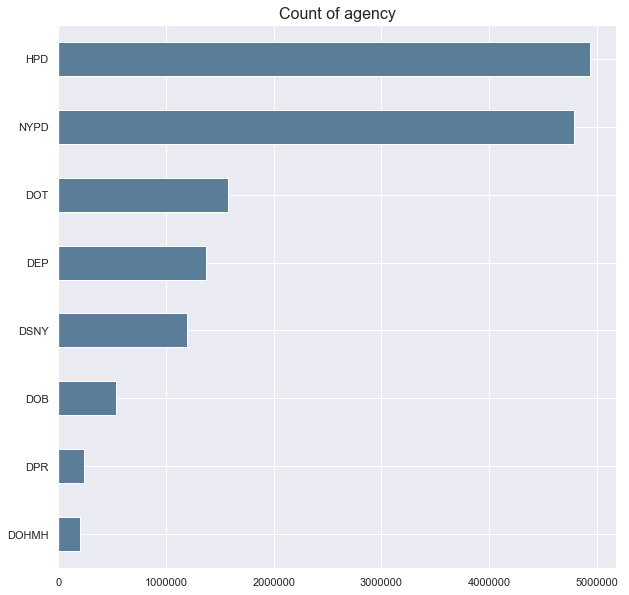

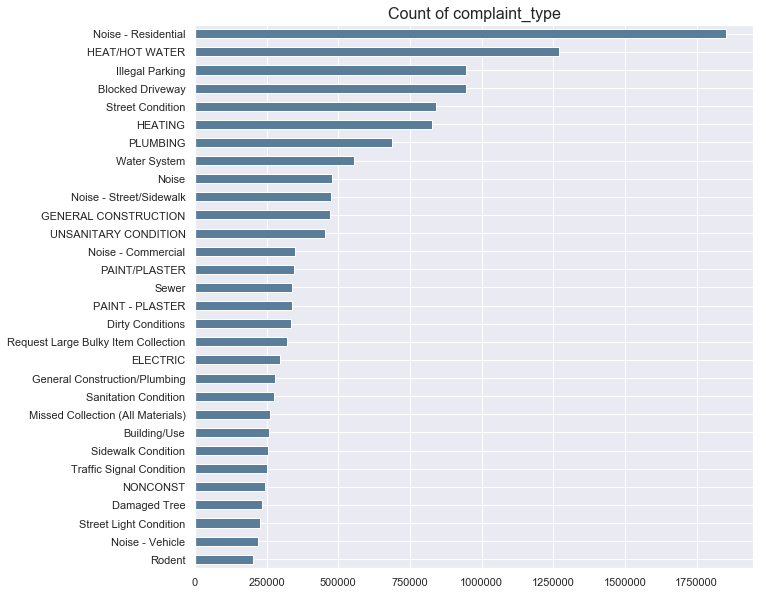

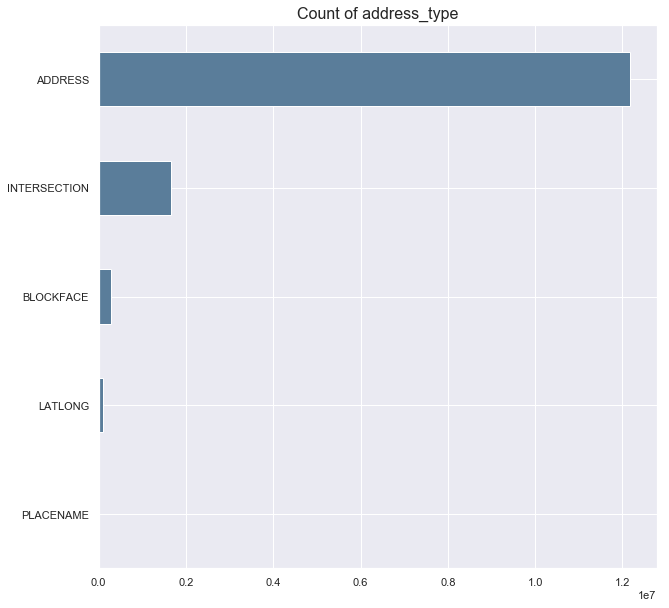

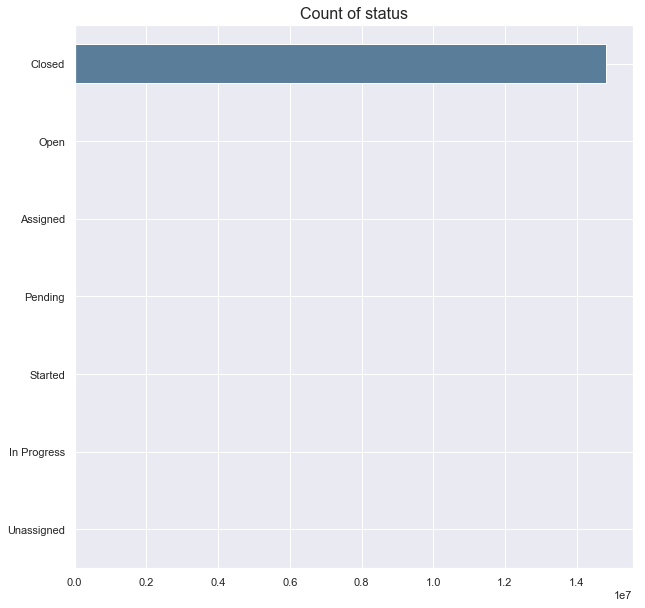

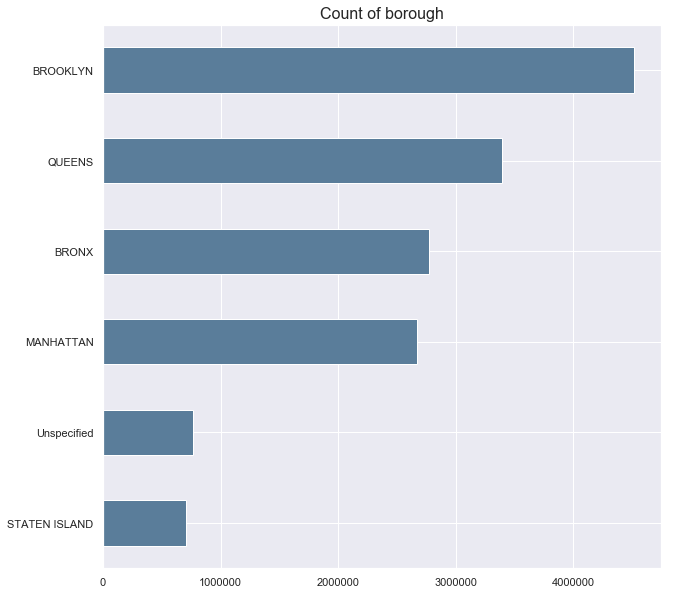

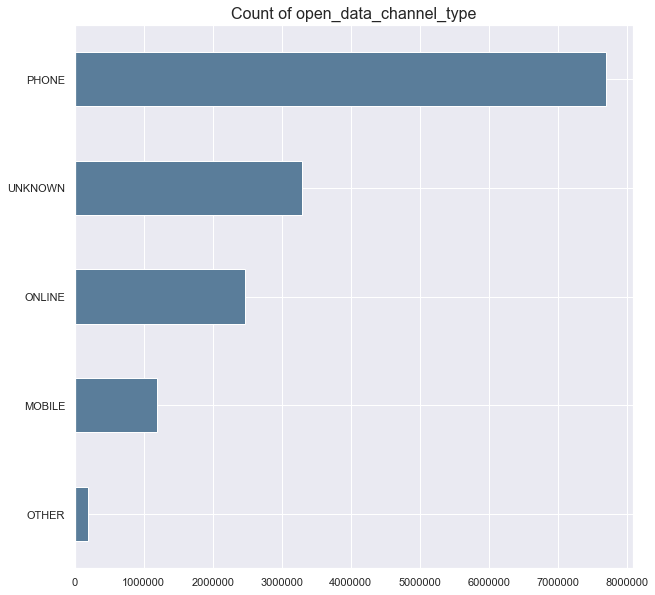

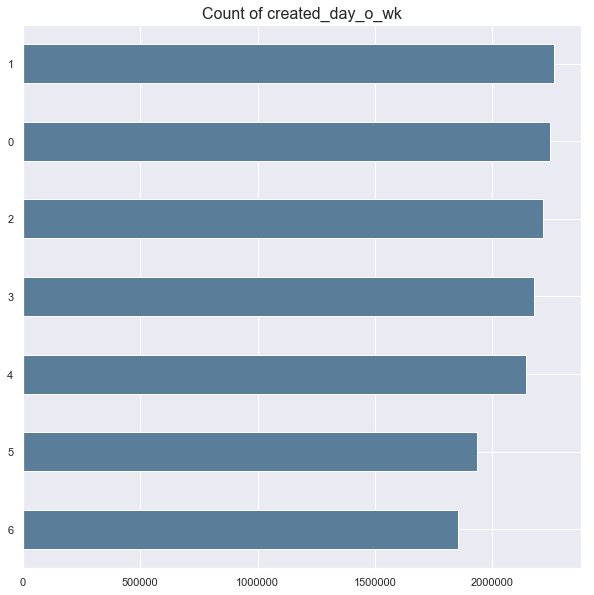

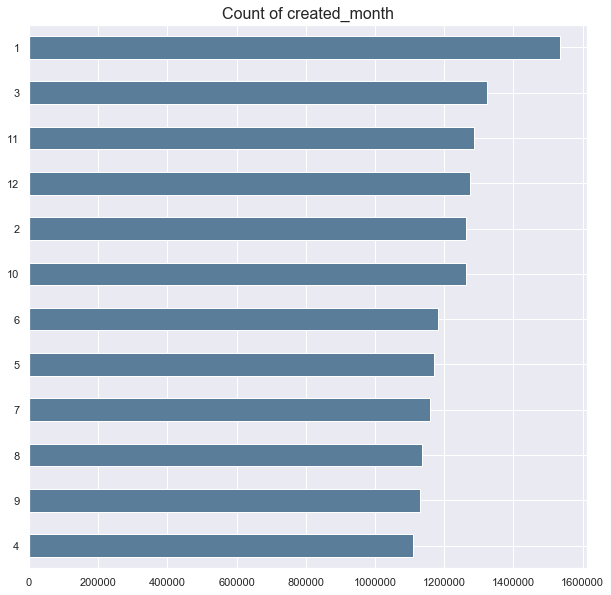

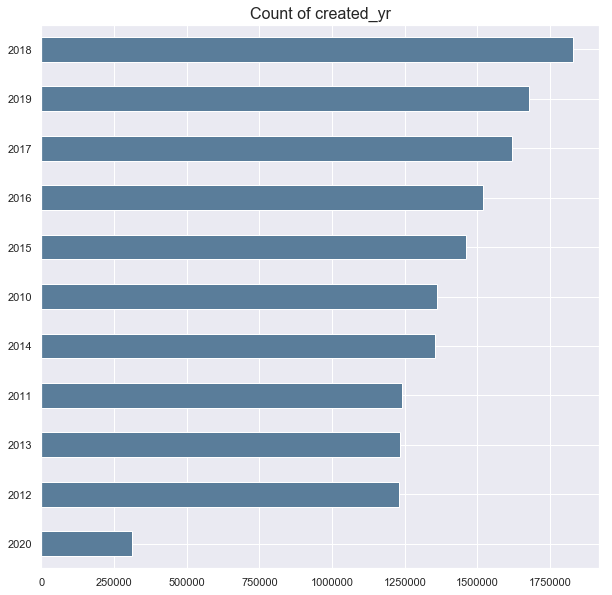

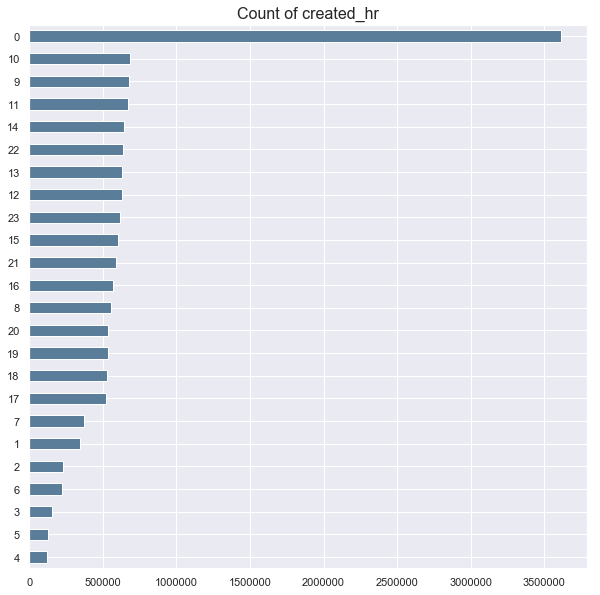

In [13]:
count_plots(df)

### Additional Drops (start df2)

In [14]:
df2 = df[df['status'] == 'Closed']
df2 = df2[df2['borough'] != 'Unspecified']
df2 = df2[df2['created_yr'] < 2020]
df2 = df2[df2['complaint_type'] != 'Request Large Bulky Item Collection']
df2 = df2[df2['median_income'] > 0]
df2.drop(columns=['status'])

display(df2.shape)
df2.head()

(13421494, 30)

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD  Noise - Residential   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD  Noise - Residential   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
2  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
3      Loud Talking  Residential Building/House      ADDRESS  Closed   
4      Loud Talking  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr created_date_only  response_time  
0          23        2017-07-09       0.103681  
1          23        2017-07-09       0.351285  
2          23        2017-07-09       0.165694  
3          20        2017-07-09       0.014456  
4          13        2017-07-09       0.175845

# Request Volumes

## Total Weekly Requests

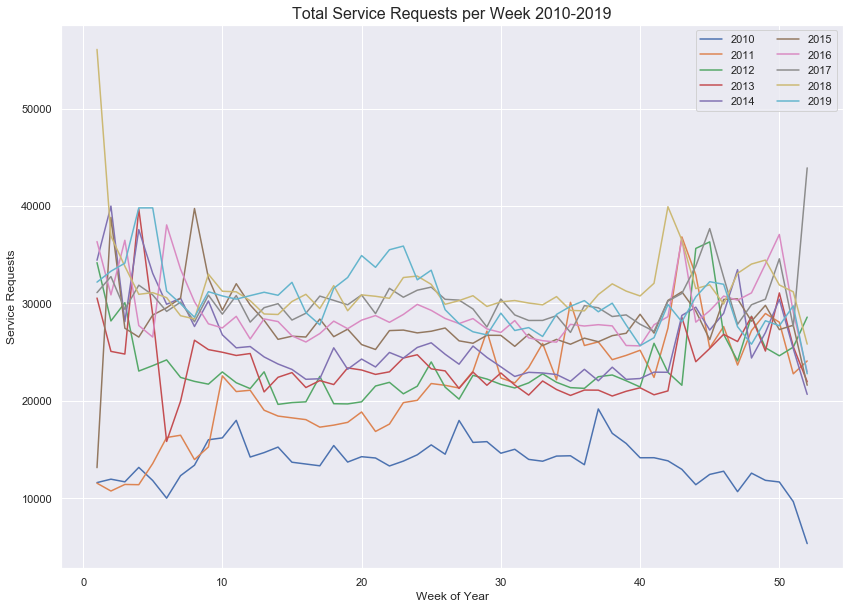

In [15]:
weekly_sr_by_yr = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.created_yr, 
                    values='created_date', aggfunc=len)

fig, ax = plt.subplots(figsize=(14,10))
# plot values in a line graph
# drop the 53rd week (leap year) which has Nans for most years
weekly_sr_by_yr.dropna().plot(ax=ax)
plt.title('Total Service Requests per Week 2010-2019', fontsize=16)
plt.ylabel('Service Requests')
plt.xlabel('Week of Year')
plt.legend(ncol=2)
plt.show()

## Mean & Median Total Weekly Requests

In [16]:
weekly_sr_by_yr

created_yr       2010     2011     2012     2013     2014     2015     2016  \
created_date                                                                  
1             11584.0  11520.0  34174.0  30537.0  34423.0  13118.0  36335.0   
2             11934.0  10718.0  28186.0  25059.0  39980.0  38814.0  30863.0   
3             11660.0  11392.0  30058.0  24784.0  28111.0  27440.0  36469.0   
4             13143.0  11367.0  23038.0  39685.0  37564.0  26528.0  27711.0   
5             11797.0  13541.0  23592.0  28829.0  33076.0  28788.0  26532.0   
6              9986.0  16213.0  24186.0  15808.0  29896.0  29539.0  38050.0   
7             12295.0  16447.0  22386.0  19943.0  30522.0  30528.0  33494.0   
8             13370.0  13948.0  21979.0  26205.0  27615.0  39733.0  30156.0   
9             15981.0  15243.0  21693.0  25241.0  30236.0  32609.0  27890.0   
10            16176.0  22542.0  22947.0  24971.0  26759.0  29282.0  27469.0   
11            17976.0  20933.0  21838.0  24640.0  25424.0  32010.0  28658.0   
12            14207.0  21066.0  21237.0  24839.0  25558.0  29826.0  26336.0   
13            14663.0  19016.0  22960.0  20897.0  24490.0  28252.0  28395.0   
14            15229.0  18416.0  19616.0  22399.0  23763.0  26296.0  28122.0   
15            13675.0  18231.0  19800.0  22879.0  23206.0  26617.0  26658.0   
16            13490.0  18050.0  19877.0  21346.0  22193.0  26535.0  26023.0   
17            13308.0  17277.0  22492.0  22059.0  22249.0  28379.0  26890.0   
18            15390.0  17485.0  19685.0  21653.0  25427.0  26570.0  28165.0   
19            13691.0  17770.0  19662.0  23363.0  23223.0  27339.0  27389.0   
20            14243.0  18835.0  19878.0  23146.0  24272.0  25760.0  28267.0   
21            14109.0  16835.0  21501.0  22695.0  23459.0  25255.0  28739.0   
22            13290.0  17594.0  21880.0  22959.0  24950.0  27193.0  28043.0   
23            13790.0  19795.0  20702.0  24380.0  24374.0  27248.0  28851.0   
24            14438.0  20034.0  21483.0  24713.0  25463.0  26959.0  29886.0   
25            15456.0  21757.0  23976.0  23264.0  25941.0  27128.0  29273.0   
26            14499.0  21573.0  21385.0  23055.0  24767.0  27461.0  28440.0   
27            17964.0  21297.0  20154.0  21252.0  23743.0  26142.0  27915.0   
28            15710.0  23012.0  22597.0  22935.0  25605.0  25895.0  28429.0   
29            15789.0  27140.0  22220.0  21579.0  24444.0  26715.0  27366.0   
30            14598.0  22330.0  21673.0  22844.0  23475.0  26704.0  27006.0   
31            15005.0  21821.0  21304.0  21603.0  22484.0  25577.0  28225.0   
32            13966.0  23415.0  21825.0  20572.0  22907.0  26827.0  26448.0   
33            13778.0  25873.0  22757.0  22018.0  22842.0  25647.0  26160.0   
34            14306.0  22147.0  21885.0  21141.0  22685.0  26294.0  26006.0   
35            14338.0  30097.0  21337.0  20536.0  21988.0  25795.0  27838.0   
36            13419.0  25661.0  21260.0  21087.0  23217.0  26418.0  27664.0   
37            19147.0  26034.0  22457.0  21077.0  22039.0  26050.0  27801.0   
38            16644.0  24208.0  22635.0  20475.0  23435.0  26673.0  27678.0   
39            15604.0  24647.0  22042.0  20961.0  22185.0  26919.0  25664.0   
40            14134.0  25174.0  21404.0  21321.0  22272.0  28870.0  25624.0   
41            14138.0  22387.0  25889.0  20600.0  22926.0  26935.0  27792.0   
42            13819.0  27447.0  22905.0  21000.0  22913.0  30292.0  28627.0   
43            12944.0  36816.0  21581.0  28541.0  28749.0  31178.0  36619.0   
44            11366.0  32907.0  35633.0  23998.0  29599.0  29205.0  28062.0   
45            12423.0  25423.0  36306.0  25354.0  27253.0  26269.0  29238.0   
46            12750.0  27611.0  26814.0  26808.0  28967.0  30395.0  30741.0   
47            10653.0  23655.0  24082.0  26070.0  33450.0  30455.0  30319.0   
48            12554.0  27197.0  28665.0  28629.0  24379.0  28158.0  31067.0   
49            11815.0  28950.0  25434.0  25096.0  

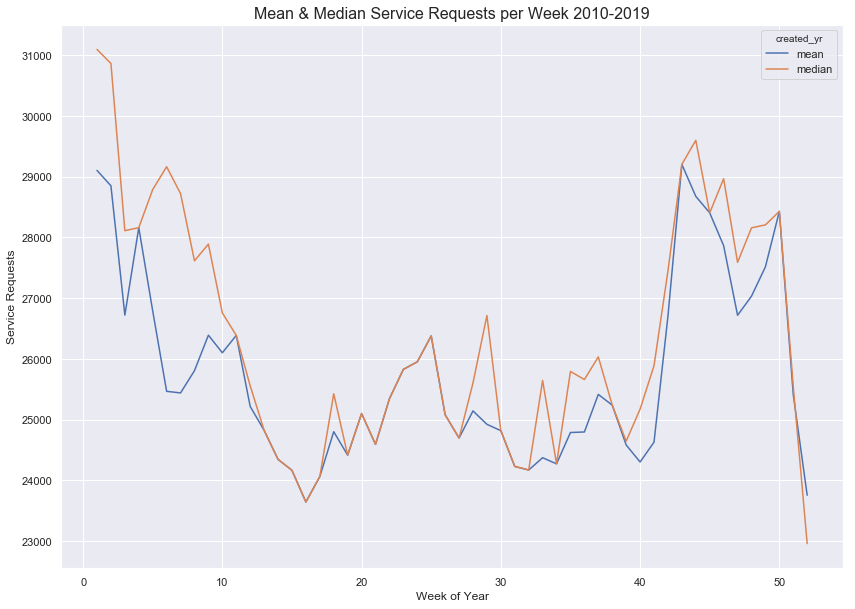

In [17]:
weekly_sr_by_yr.dropna(inplace=True)
weekly_sr_by_yr['mean'] = weekly_sr_by_yr.mean(axis=1)
weekly_sr_by_yr['median'] = weekly_sr_by_yr.median(axis=1)

fig, ax = plt.subplots(figsize=(14,10))
weekly_sr_by_yr[['mean', 'median']].plot(ax=ax)
plt.title('Mean & Median Service Requests per Week 2010-2019', fontsize=16)
plt.ylabel('Service Requests')
plt.xlabel('Week of Year')
plt.show()

## Request Volume by Complaint Type

### Total Weekly Requests by Complaint Type

In [18]:
weekly_sr_by_ctype = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.complaint_type, 
                    values='created_date', aggfunc=len).dropna()

In [19]:
weekly_sr_by_ctype

complaint_type  Blocked Driveway  Building/Use  Damaged Tree  \
created_date                                                   
1                        18230.0        4031.0        1248.0   
2                        17376.0        4517.0        1542.0   
3                        15865.0        4167.0        1195.0   
4                        17776.0        4410.0        2015.0   
5                        17963.0        4596.0        1626.0   
6                        18401.0        4437.0        2022.0   
7                        17420.0        4335.0        2177.0   
8                        16552.0        4335.0        2192.0   
9                        16904.0        4548.0        4059.0   
10                       17514.0        4748.0        5244.0   
11                       18166.0        4634.0        3381.0   
12                       16841.0        4936.0        2514.0   
13                       16243.0        4672.0        2856.0   
14                       15977.0        4912.0        2406.0   
15                       15680.0        5140.0        2081.0   
16                       15906.0        4915.0        2492.0   
17                       15476.0        5220.0        2731.0   
18                       16484.0        5008.0        3869.0   
19                       17031.0        5932.0        3495.0   
20                       17241.0        5366.0        4865.0   
21                       16428.0        5362.0        4003.0   
22                       17213.0        5041.0        4016.0   
23                       17901.0        5493.0        4601.0   
24                       18274.0        5522.0        4667.0   
25                       18704.0        5554.0        5142.0   
26                       17072.0        5556.0        4811.0   
27                       15689.0        4802.0        4570.0   
28                       16571.0        5317.0        5952.0   
29                       16383.0        5402.0        7267.0   
30                       16387.0        5458.0        6824.0   
31                       16160.0        5352.0        5279.0   
32                       15996.0        5628.0        5143.0   
33                       15835.0        5412.0        5284.0   
34                       15275.0        5012.0        6881.0   
35                       16187.0        5187.0        8721.0   
36                       18723.0        4837.0        4911.0   
37                       19284.0        5264.0        8854.0   
38                       18719.0        5215.0        6698.0   
39                       18698.0        5298.0        4460.0   
40                       18273.0        5050.0        3662.0   
41                       17808.0        4698.0        3983.0   
42                       18305.0        4917.0        4102.0   
43                       19165.0        4769.0        5022.0   
44                       18726.0        4670.0       22060.0   
45                       19460.0        4382.0       10991.0   
46                       19968.0        4316.0        7421.0   
47                       19525.0        3886.0        3470.0   
48                       19400.0        4211.0        3233.0   
49                       19766.0        4463.0        2386.0   
50                       19679.0        3962.0        1735.0   
51                       19833.0        3521.0        1769.0   
52                       19096.0        3193.0        1322.0   

complaint_type  Dirty Conditions  ELECTRIC  GENERAL CONSTRUCTION  \
created_date                                                       
1                         4989.0    4942.0                6636.0   
2                         5467.0    5432.0                7942.0   
3                         5572.0    4934.0                7413.0   
4                         4525.0    4851.0                7443.0   
5                         4971.0    5023.0                7292.0   
6                         4460.0    4810.0                5827.0   

In [20]:
# iterate through the pivot table and plot a line graph for weach complaint type
def plot_sr(pivot_table, figsize=(15,40), hspace=.9):
    
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=hspace)

    nrows = len(pivot_table.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(pivot_table.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        pivot_table[t].plot(ax=ax)
        plt.title(t + '_Total Weekly Requests')

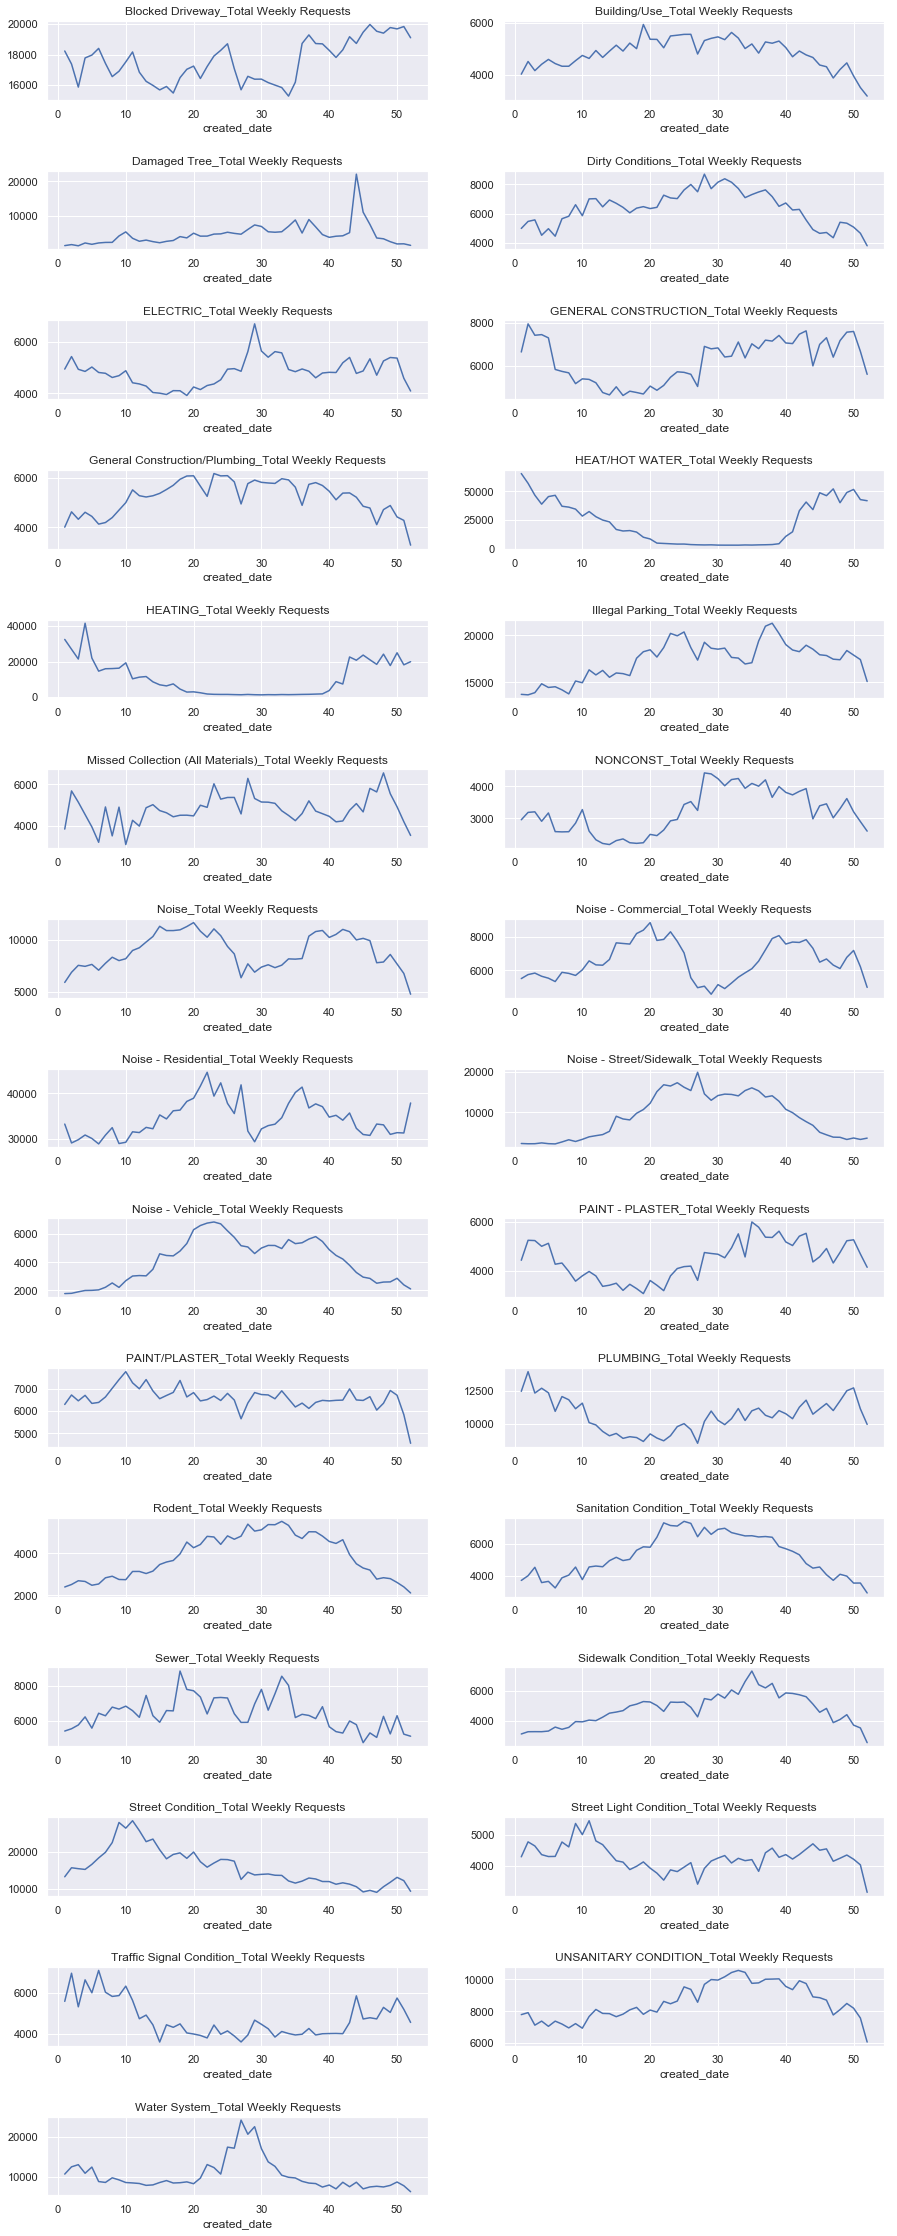

In [21]:
plot_sr(weekly_sr_by_ctype)

### Mean & Median Weekly Requests by Complaint Type

In [22]:
weekly_sr_by_ctype_yr = pd.pivot_table(df2, 
                                    index=[df2.complaint_type, 
                                           df2.created_date.dt.weekofyear], 
                                    columns=df2.created_yr, 
                                    values='created_date', 
                                    aggfunc=len).drop(index=53, level=1)

In [23]:
weekly_sr_by_ctype_yr['mean'] = weekly_sr_by_ctype_yr.mean(axis=1)
weekly_sr_by_ctype_yr['median'] = weekly_sr_by_ctype_yr.median(axis=1)

weekly_sr_by_ctype_yr.head()

created_yr                      2010    2011    2012    2013    2014    2015  \
complaint_type   created_date                                                  
Blocked Driveway 1             867.0  1376.0  1035.0  1244.0  1696.0   976.0   
                 2             892.0  1515.0   944.0   982.0  1147.0  1707.0   
                 3             882.0  1267.0   993.0  1020.0  1190.0  1392.0   
                 4             914.0  1708.0   912.0   967.0  1345.0  1607.0   
                 5             954.0  2068.0   908.0  1051.0  1444.0  1823.0   

created_yr                       2016    2017    2018    2019    mean  median  
complaint_type   created_date                                                  
Blocked Driveway 1             2074.0  2478.0  3323.0  3161.0  1823.0  1696.0  
                 2             2171.0  2449.0  2973.0  2596.0  1737.6  1707.0  
                 3             1787.0  2404.0  2443.0  2487.0  1586.5  1392.0  
                 4             3134.0  2348.0  2458.0  2383.0  1777.6  1708.0  
                 5             2222.0  2299.0  2497.0  2697.0  1796.3  1823.0

In [24]:
complaint_types = sorted(list(df2.complaint_type.unique()))

In [25]:
def plot_sr_by(pivot_table, variable_list, figsize=(15,60), hspace=.5):
    """docstring"""
    
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=hspace)

    nrows = len(variable_list) //2 +1 
    ncols = 2

    for i,t in enumerate(list(variable_list)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        pivot_table.loc[t][['mean','median']].plot(ax=ax)
        plt.title(t + '_Mean & Median Weekly Requests 2010-2019')
        plt.legend(title='Weekly Requests')

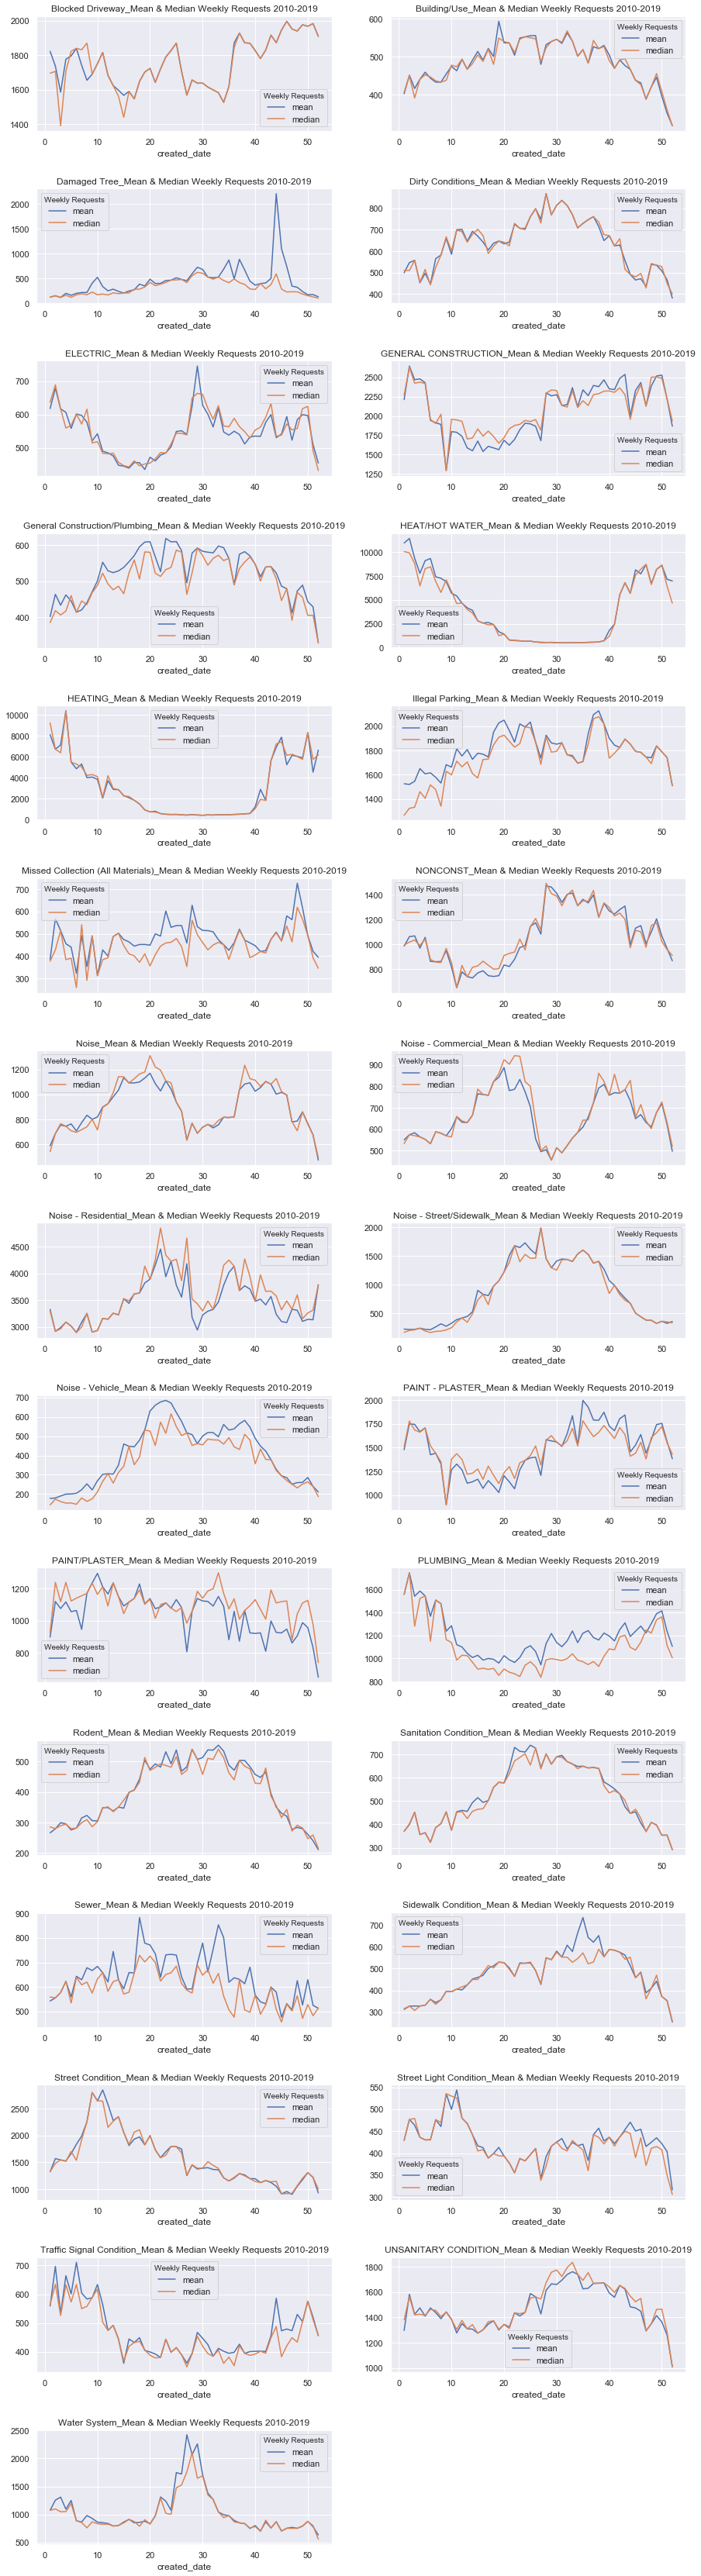

In [26]:
plot_sr_by(weekly_sr_by_ctype_yr, complaint_types)

## Request Volume by Agency

### Total Requests by Agency

In [27]:
weekly_sr_by_agy = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.agency, 
                    values='created_date', aggfunc=len).drop(index=53)

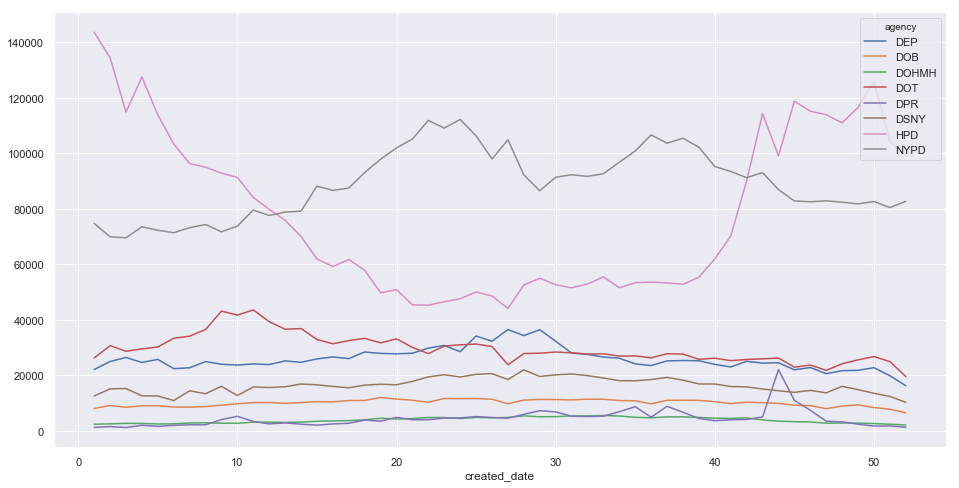

In [28]:
weekly_sr_by_agy.plot(figsize=(16,8))

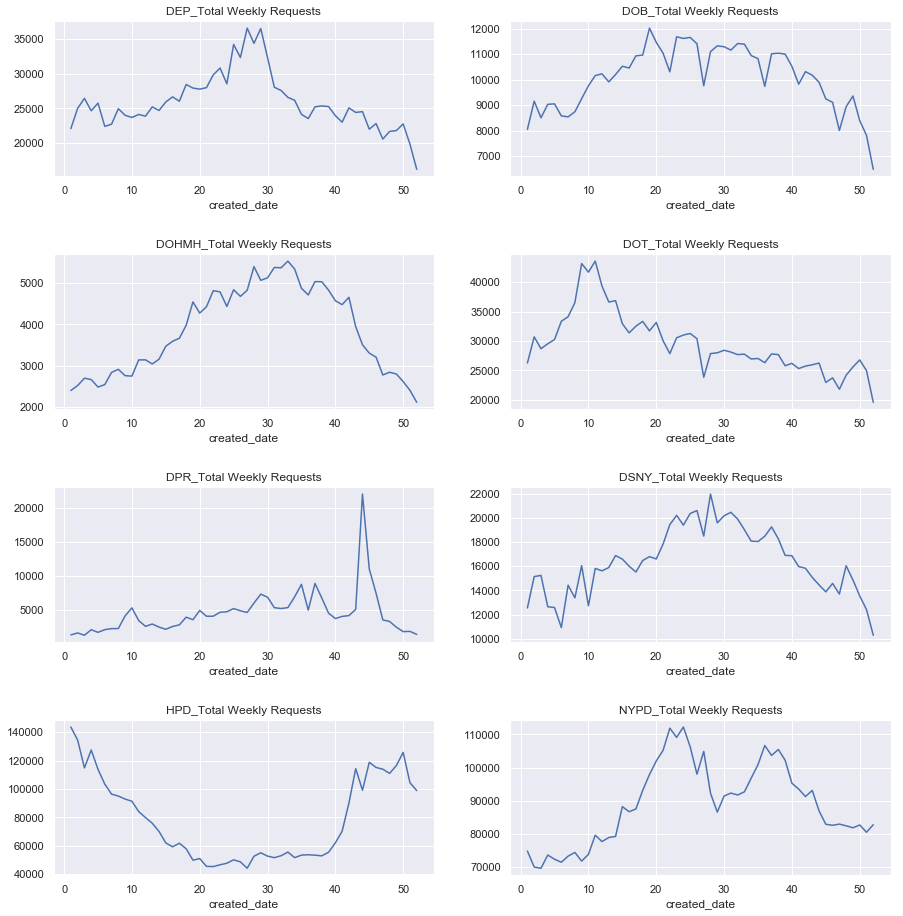

In [29]:
plot_sr(weekly_sr_by_agy, figsize=(15,20), hspace=.5)

### Mean & Median Weekly Requests by Agency

In [30]:
weekly_sr_by_agy_yr = pd.pivot_table(df2, 
                                     index=[df2.agency, 
                                            df2.created_date.dt.weekofyear], 
                                     columns=df2.created_yr, 
                                     values='created_date', 
                                     aggfunc=len).drop(index=53, level=1)

weekly_sr_by_agy_yr['mean'] = weekly_sr_by_agy_yr.mean(axis=1)
weekly_sr_by_agy_yr['median'] = weekly_sr_by_agy_yr.median(axis=1)

weekly_sr_by_agy_yr.head()

created_yr             2010    2011    2012    2013    2014    2015    2016  \
agency created_date                                                           
DEP    1             2200.0  1831.0  2026.0  2291.0  2026.0   814.0  2691.0   
       2             2158.0  1699.0  1621.0  2259.0  3098.0  2330.0  2253.0   
       3             1962.0  2071.0  1492.0  1834.0  2407.0  3122.0  4080.0   
       4             2194.0  1942.0  1847.0  2379.0  1944.0  2735.0  2349.0   
       5             2041.0  2035.0  1791.0  3368.0  2805.0  1793.0  2487.0   

created_yr             2017    2018    2019    mean  median  
agency created_date                                          
DEP    1             2025.0  3660.0  2526.0  2209.0  2200.0  
       2             2458.0  4586.0  2549.0  2501.1  2330.0  
       3             2919.0  3920.0  2630.0  2643.7  2630.0  
       4             2748.0  3065.0  3451.0  2465.4  2379.0  
       5             3636.0  2721.0  3074.0  2575.1  2575.1

In [31]:
agencies = sorted(list(df2.agency.unique()))
agencies

['DEP', 'DOB', 'DOHMH', 'DOT', 'DPR', 'DSNY', 'HPD', 'NYPD']

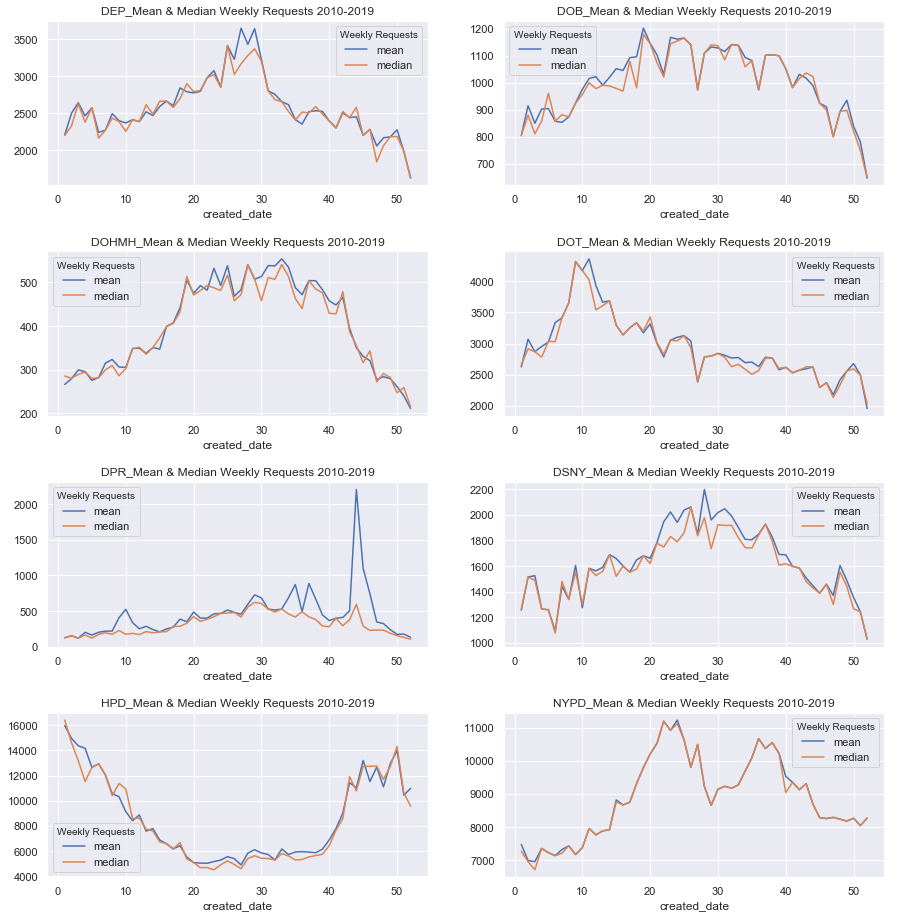

In [32]:
plot_sr_by(weekly_sr_by_agy_yr, agencies, figsize=(15,20), hspace=.4)

## Request Volume by Borough

### Total Weekly Requests by Borough

In [33]:
weekly_sr_by_boro = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.borough, 
                    values='created_date', aggfunc=len).drop(index=53)

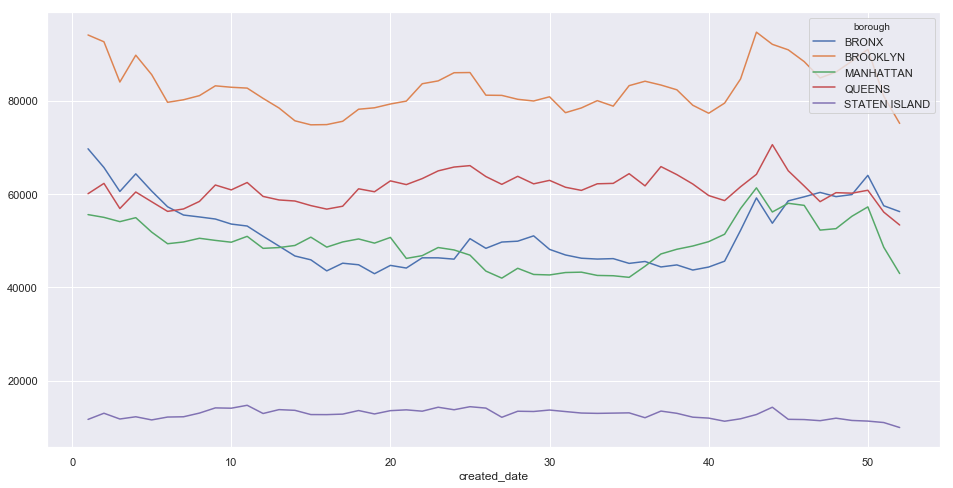

In [34]:
weekly_sr_by_boro.plot(figsize=(16,8))

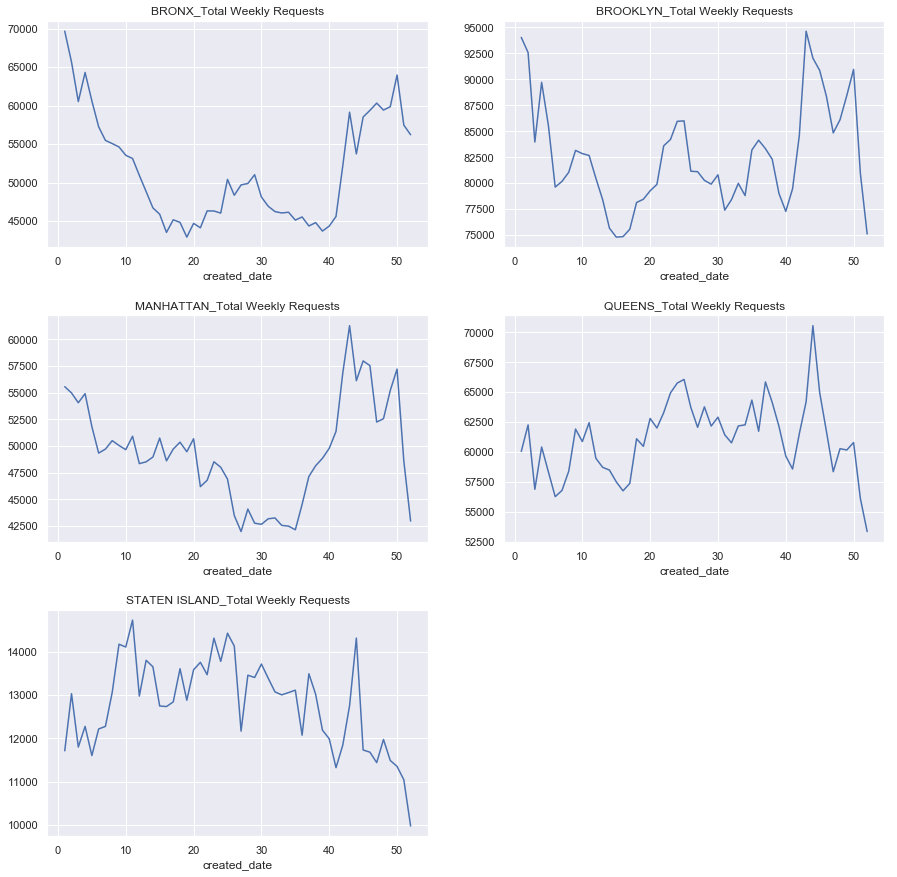

In [35]:
plot_sr(weekly_sr_by_boro, figsize=(15,15), hspace=.3)

### Mean & Median Weekly Requests by Borough

In [36]:
weekly_sr_by_boro_yr = pd.pivot_table(df2, 
                                     index=[df2.borough, 
                                            df2.created_date.dt.weekofyear], 
                                     columns=df2.created_yr, 
                                     values='created_date', 
                                     aggfunc=len).drop(index=53, level=1)

weekly_sr_by_boro_yr['mean'] = weekly_sr_by_boro_yr.mean(axis=1)
weekly_sr_by_boro_yr['median'] = weekly_sr_by_boro_yr.median(axis=1)

weekly_sr_by_boro_yr.head()

created_yr              2010    2011    2012     2013     2014    2015  \
borough created_date                                                     
BRONX   1             1615.0  1614.0  8558.0   7523.0   9142.0  3161.0   
        2             1750.0  1550.0  6869.0   5432.0   9553.0  9640.0   
        3             1653.0  1668.0  8009.0   5828.0   6555.0  6281.0   
        4             1775.0  1672.0  5577.0  10056.0  10415.0  5881.0   
        5             1809.0  1810.0  5708.0   6679.0   8236.0  6969.0   

created_yr              2016    2017     2018     2019    mean  median  
borough created_date                                                    
BRONX   1             8789.0  7988.0  14211.0   7067.0  6966.8  7523.0  
        2             7221.0  7747.0   8355.0   7537.0  6565.4  7221.0  
        3             8772.0  6374.0   7330.0   8054.0  6052.4  6374.0  
        4             6280.0  6859.0   6257.0   9532.0  6430.4  6280.0  
        5             5870.0  6725.0   6708.0  10097.0  6061.1  6679.0

In [37]:
boroughs = sorted(list(df2.borough.unique()))
boroughs

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

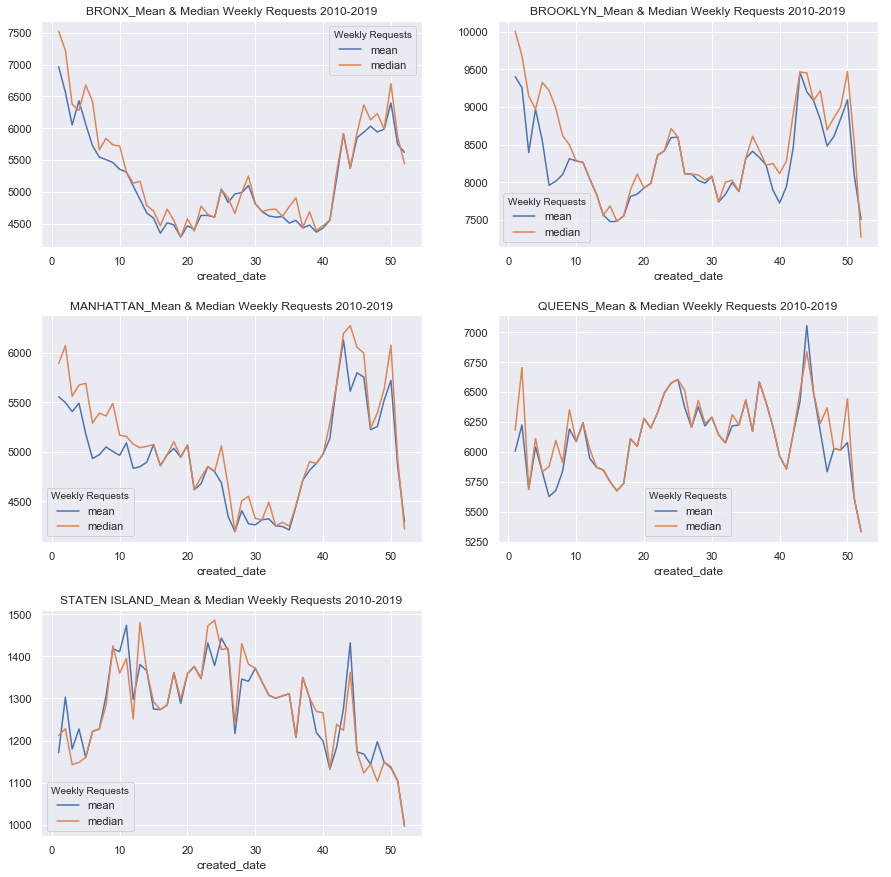

In [38]:
plot_sr_by(weekly_sr_by_boro_yr, boroughs, figsize=(15,15), hspace=.3)

# Per Capita Requests

## Per Capita Requests by Borough

In [39]:
yrly_sr_by_boro = pd.pivot_table(df2, 
                                 index=df2.borough, 
                                 columns=df2.created_yr, 
                                 values='created_date', 
                                 aggfunc=len)
yrly_sr_by_boro

created_yr       2010    2011    2012    2013    2014    2015    2016    2017  \
borough                                                                         
BRONX          103619  222662  261809  269563  277905  289717  310946  315901   
BROOKLYN       214633  373181  401971  405752  434723  461683  481161  505035   
MANHATTAN      128634  203177  224871  245217  269132  299013  303815  299808   
QUEENS         219448  257558  275028  255859  303347  340482  353793  380592   
STATEN ISLAND   50073   61154   58073   57007   66773   69950   69854   73614   

created_yr       2018    2019  
borough                        
BRONX          327309  310144  
BROOKLYN       524863  500320  
MANHATTAN      307283  295068  
QUEENS         406072  393387  
STATEN ISLAND   82643   77872

In [40]:
yrly_sr_per_1000_by_boro = yrly_sr_by_boro.copy()

for b in boroughs:
    yrly_sr_per_1000_by_boro.loc[b] = round(yrly_sr_per_1000_by_boro.loc[b] / (boro_pops[b]/1000),
                                            2)
    
yrly_sr_per_1000_by_boro

created_yr       2010    2011    2012    2013    2014    2015    2016    2017  \
borough                                                                         
BRONX           68.28  146.72  172.51  177.62  183.12  190.90  204.89  208.15   
BROOKLYN        76.52  133.05  143.31  144.66  154.99  164.60  171.55  180.06   
MANHATTAN       73.26  115.71  128.07  139.66  153.28  170.30  173.03  170.75   
QUEENS          79.04   92.77   99.06   92.16  109.26  122.64  127.43  137.09   
STATEN ISLAND  105.62  128.99  122.49  120.24  140.84  147.54  147.34  155.27   

created_yr       2018    2019  
borough                        
BRONX          215.67  204.36  
BROOKLYN       187.13  178.38  
MANHATTAN      175.01  168.05  
QUEENS         146.26  141.69  
STATEN ISLAND  174.32  164.25

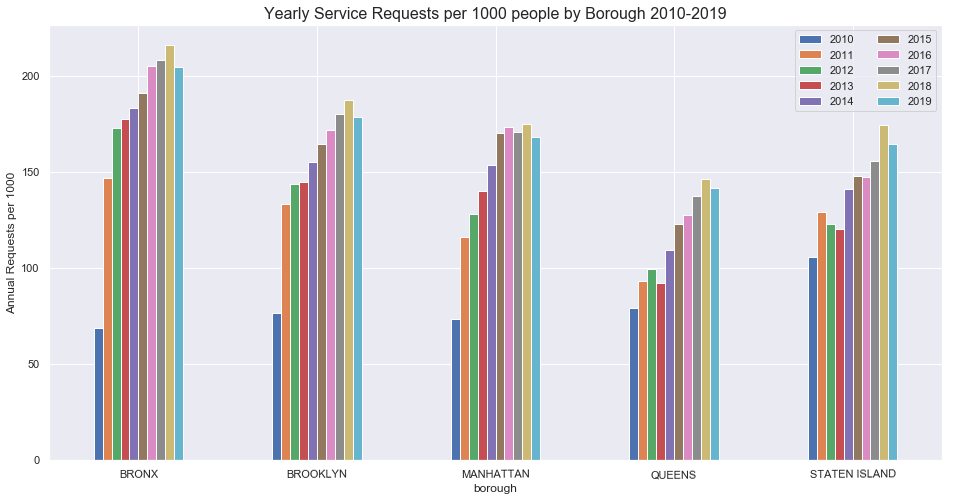

In [41]:
yrly_sr_per_1000_by_boro.plot(kind='bar', figsize=(16,8))
plt.title('Yearly Service Requests per 1000 people by Borough 2010-2019',
           fontsize = 16)
plt.ylabel('Annual Requests per 1000')
plt.legend(ncol=2)
plt.xticks(rotation=.45)
plt.show()

## Per Capita Request by Zipcode

In [42]:
yrly_sr_by_zip = pd.pivot_table(df2, 
                                index=df2.new_zip, 
                                columns=df2.created_yr, 
                                values='created_date', 
                                aggfunc=len)
yrly_sr_by_zip

created_yr     2010     2011     2012     2013     2014     2015     2016  \
new_zip                                                                     
10001        3196.0   3836.0   3156.0   3960.0   4913.0   5621.0   7462.0   
10002        6345.0   7679.0   8050.0   8814.0   9742.0  12910.0  12805.0   
10003        5524.0   6814.0   7064.0   7883.0   8744.0   9877.0   9729.0   
10004         643.0    708.0    758.0    809.0    999.0    990.0   1094.0   
10005         656.0    824.0    963.0   1011.0   1157.0   1140.0   1401.0   
10006         481.0    683.0    444.0    544.0    669.0    748.0    853.0   
10007        1446.0   1515.0   1311.0   1377.0   1584.0   1884.0   2133.0   
10009        4998.0   6475.0   8141.0   8792.0   8856.0   9939.0  11103.0   
10010        2086.0   2601.0   2646.0   3045.0   4251.0   3915.0   4167.0   
10011        4886.0   6138.0   6145.0   7157.0   7483.0   8198.0   7964.0   
10012        3351.0   3995.0   3983.0   5206.0   5369.0   5826.0   5803.0   
10013        4718.0   5208.0   4485.0   4873.0   5686.0   6126.0   6214.0   
10014        4147.0   5335.0   5500.0   5824.0   5688.0   6831.0   6632.0   
10016        4075.0   4963.0   5324.0   6220.0   7495.0   7351.0   8081.0   
10017        1687.0   2002.0   1850.0   1987.0   2651.0   3579.0   2899.0   
10018        1484.0   1847.0   1750.0   1896.0   2136.0   2476.0   2635.0   
10019        4130.0   5769.0   5914.0   6415.0   7625.0   8871.0   9157.0   
10021        2458.0   3371.0   3131.0   3233.0   3489.0   3963.0   4102.0   
10022        3077.0   3671.0   3508.0   4002.0   4212.0   5025.0   4557.0   
10023        3626.0   4351.0   4442.0   4825.0   5542.0   6445.0   5560.0   
10024        3583.0   5185.0   4989.0   5481.0   6342.0   6649.0   7296.0   
10025        5639.0   8307.0  10047.0  10356.0  11896.0  12873.0  12774.0   
10026        2666.0   5277.0   6130.0   7105.0   7926.0   8262.0   7496.0   
10027        4485.0   9160.0  10237.0  11049.0  12342.0  12986.0  13029.0   
10028        2561.0   3993.0   3464.0   3859.0   4322.0   5593.0   5014.0   
10029        4683.0   7405.0   8701.0   9519.0  10795.0  13312.0  11551.0   
10030        2110.0   5277.0   6466.0   7943.0   7434.0   7690.0   7767.0   
10031        5812.0  12849.0  16173.0  16519.0  17440.0  18011.0  20101.0   
10032        5214.0  11858.0  14732.0  15721.0  17272.0  17946.0  16054.0   
10033        3867.0   8871.0  10998.0  12172.0  12035.0  12965.0  15028.0   
10034        3659.0   8214.0  10535.0  10415.0  11752.0  14468.0  14305.0   
10035        2557.0   5180.0   5873.0   6161.0   6088.0   7039.0   7216.0   
10036        2931.0   4068.0   4975.0   4647.0   6395.0   7207.0   7699.0   
10037        1135.0   2507.0   2719.0   3316.0   3146.0   2919.0   3486.0   
10038        1744.0   2091.0   2379.0   2521.0   2750.0   3203.0   3867.0   
10039        1752.0   3756.0   4557.0   4801.0   5186.0   4817.0   5844.0   
10040        4053.0  11067.0  12678.0  13787.0  14734.0  16576.0  16470.0   
10044          65.0     67.0     79.0    157.0    225.0    186.0    230.0   
10065        2048.0   2790.0   2739.0   2654.0   3193.0   3993.0   3896.0   
10069          85.0     79.0    101.0    179.0    182.0    161.0    208.0   
10075        1476.0   2245.0   1889.0   2090.0   2343.0   2302.0   2363.0   
10128        3082.0   4091.0   4493.0   4935.0   5449.0   6486.0   5930.0   
10162           8.0      7.0      8.0      8.0     22.0     29.0     16.0   
10280         171.0    162.0    211.0    256.0    319.0    315.0    319.0   
10282         119.0     72.0     69.0     83.0    105.0    100.0    304.0   
10301        4450.0   6445.0   6745.0   6452.0   6993.0   7803.0   8267.0   
10302        2337.0   3547.0   3282.0   2797.0   3275.0   3850.0   3506.0   
10303        2733.0   3571.0   3536.0   3590.0   4225.0   3949.0   4130.0   
10304        4379.0   6393.0   6405.0   6333.0   7466.0   7166.0   7208.0   
10305        4550.0   5408.0   4948.0   4808.0   5838.0   6050.0   6263.0

In [50]:
yrly_sr_per_1000_by_zip = yrly_sr_by_zip.copy()

for z in zip_codes:
    try:
        yrly_sr_per_1000_by_zip.loc[z] = round(yrly_sr_per_1000_by_zip.loc[z] / 
                                               (zip_pops.loc[z]/1000),2)

    except:
        continue
        
yrly_sr_per_1000_by_zip['mean'] = round(yrly_sr_per_1000_by_zip.mean(axis=1), 2)

yrly_sr_per_1000_by_zip['median'] = round(yrly_sr_per_1000_by_zip.median(axis=1), 2)

yrly_sr_per_1000_by_zip

created_yr    2010    2011    2012    2013    2014    2015    2016    2017  \
new_zip                                                                      
10001       139.42  167.34  137.67  172.74  214.32  245.20  325.51  256.85   
10002        84.61  102.40  107.34  117.53  129.91  172.15  170.75  178.07   
10003       101.02  124.61  129.18  144.16  159.91  180.63  177.92  178.03   
10004       212.35  233.82  250.33  267.17  329.92  326.95  361.29  337.52   
10005        74.28   93.31  109.05  114.48  131.02  129.09  158.65  114.26   
10006       139.26  197.74  128.55  157.50  193.69  216.56  246.96  236.54   
10007       205.89  215.72  186.67  196.07  225.54  268.26  303.72  275.24   
10009        86.28  111.78  140.54  151.78  152.89  171.58  191.68  184.20   
10010        61.84   77.11   78.45   90.28  126.03  116.07  123.54  131.99   
10011        96.81  121.61  121.75  141.80  148.26  162.43  157.79  160.49   
10012       143.14  170.65  170.13  222.37  229.34  248.86  247.87  258.94   
10013       164.34  181.41  156.22  169.74  198.06  213.38  216.45  245.71   
10014       134.91  173.56  178.93  189.47  185.05  222.23  215.76  202.97   
10016        79.81   97.21  104.28  121.82  146.80  143.98  158.27  161.23   
10017       106.77  126.70  117.08  125.75  167.77  226.50  183.47  190.43   
10018       153.20  190.67  180.65  195.73  220.50  255.60  272.01  275.11   
10019        94.50  132.00  135.32  146.79  174.47  202.98  209.53  191.63   
10021        53.19   72.94   67.75   69.96   75.49   85.75   88.76   83.87   
10022        98.86  117.94  112.71  128.58  135.33  161.45  146.41  145.09   
10023        58.08   69.69   71.15   77.28   88.76  103.23   89.05  102.71   
10024        60.73   87.88   84.56   92.90  107.49  112.69  123.66  126.96   
10025        60.76   89.51  108.26  111.59  128.18  138.71  137.64  147.27   
10026        67.73  134.06  155.73  180.50  201.36  209.89  190.43  202.25   
10027        69.48  141.91  158.60  171.17  191.21  201.18  201.85  187.10   
10028        53.59   83.55   72.48   80.74   90.43  117.03  104.91  106.63   
10029        58.83   93.03  109.31  119.59  135.62  167.24  145.12  154.65   
10030        70.61  176.59  216.38  265.81  248.78  257.35  259.92  268.49   
10031        96.46  213.25  268.41  274.16  289.44  298.92  333.60  330.17   
10032        81.13  184.52  229.24  244.63  268.77  279.25  249.81  245.22   
10033        64.87  148.82  184.51  204.20  201.91  217.51  252.12  246.55   
10034        85.27  191.42  245.51  242.72  273.88  337.17  333.37  321.51   
10035        71.54  144.92  164.31  172.37  170.33  196.93  201.89  205.22   
10036       106.86  148.32  181.38  169.43  233.16  262.76  280.70  240.23   
10037        53.69  118.60  128.62  156.87  148.82  138.09  164.91  180.42   
10038        76.49   91.71  104.34  110.57  120.61  140.48  169.61  135.31   
10039        63.19  135.47  164.36  173.16  187.04  173.74  210.78  224.77   
10040        90.93  248.30  284.45  309.33  330.57  371.90  369.52  318.23   
10044         5.56    5.74    6.76   13.44   19.26   15.92   19.69   17.03   
10065        72.86   99.26   97.44   94.42  113.59  142.05  138.60  114.73   
10069        16.72   15.54   19.86   35.20   35.79   31.66   40.90   43.46   
10075        68.47  104.15   87.63   96.96  108.69  106.79  109.62  128.36   
10128        52.01   69.04   75.82   83.28   91.96  109.46  100.07   99.10   
10162         5.05    4.42    5.05    5.05   13.89   18.31   10.10   13.26   
10280        18.22   17.26   22.49   27.28   33.99   33.57   33.99   44.54   
10282        21.28   12.87   12.34   14.84   18.77   17.88   54.35   40.23   
10301       114.89  166.40  174.14  166.58  180.54  201.46  213.44  199.96   
10302       128.38  194.85  180.29  153.65  179.91  211.49  192.60  189.19   
10303       105.33  137.63  136.28  138.36  162.83  152.19  159.17  163.49   
10304       106.64  155.68  155.98  154.22  181.81  174.51  175.53  186.73   
10305       107.57  12

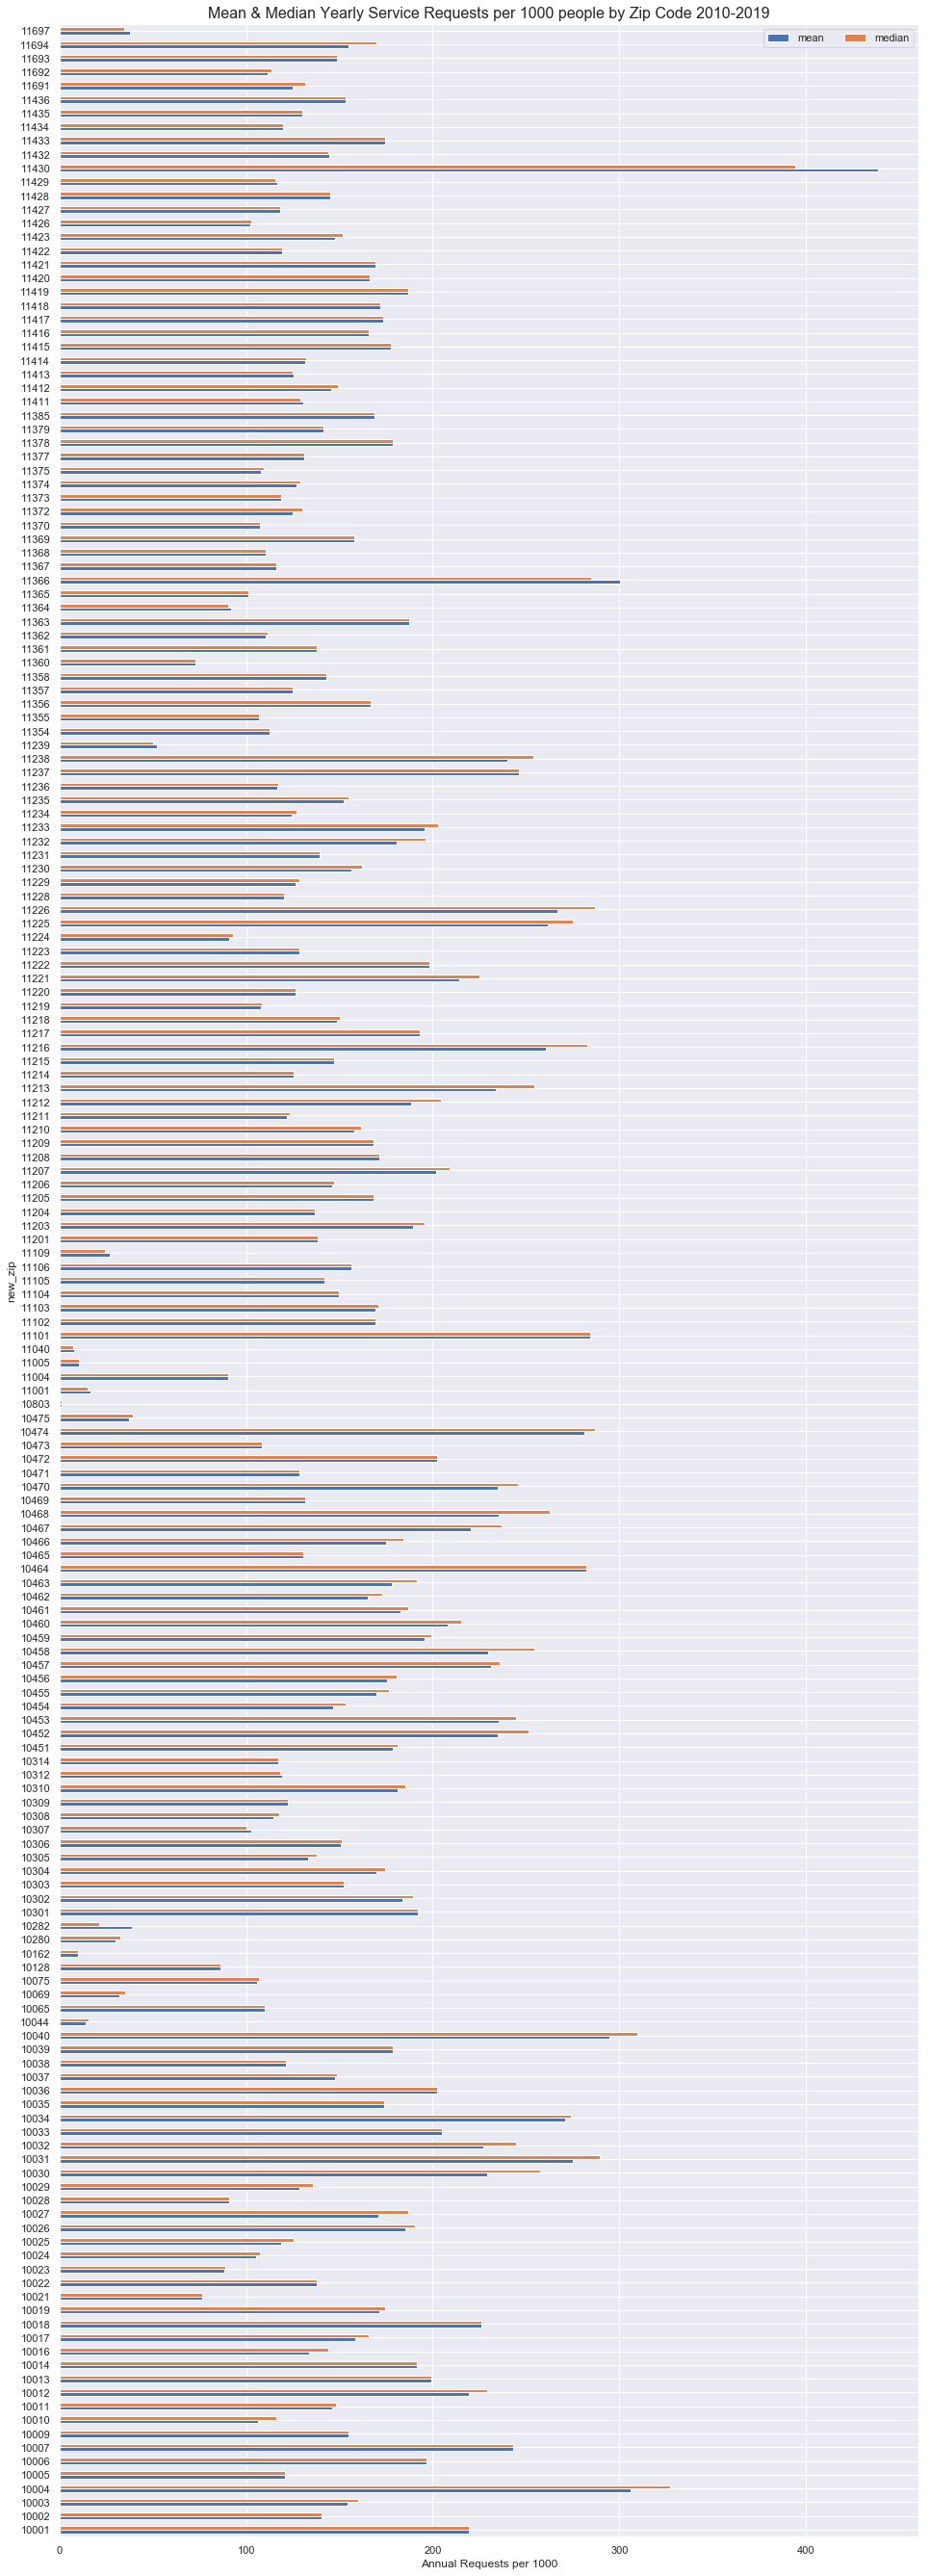

In [51]:
yrly_sr_per_1000_by_zip[['mean','median']].plot(kind='barh', figsize=(16,48))
plt.title('Mean & Median Yearly Service Requests per 1000 people by Zip Code 2010-2019',
           fontsize = 16)
plt.xlabel('Annual Requests per 1000')
plt.legend(ncol=2)
plt.xticks(rotation=.45)
plt.show()

## Per Capita Complaint Type by Borough

In [52]:
n_years = df2.created_date.dt.year.nunique()

avg_yrly_comptype_by_boro = pd.pivot_table(df2, 
                                           index=df.complaint_type, 
                                           columns=df2.borough, 
                                           values='created_date', 
                                           aggfunc=len) / n_years
avg_yrly_comptype_by_boro

borough                              BRONX  BROOKLYN  MANHATTAN   QUEENS  \
complaint_type                                                             
Blocked Driveway                   15429.4   33448.5     2476.7  37491.9   
Building/Use                        2911.8    7283.1     1648.5  11770.4   
Damaged Tree                        1596.9    7173.0     1219.8  10939.7   
Dirty Conditions                    4772.5   10501.0     4721.0  10422.9   
ELECTRIC                            7156.0    9484.2     4199.4   3640.6   
GENERAL CONSTRUCTION                9982.6   12320.7     5606.6   3679.2   
General Construction/Plumbing       2778.4    9672.0     6180.6   7009.2   
HEAT/HOT WATER                     39410.4   36681.1    27452.0  16197.9   
HEATING                            17848.5   17799.1    12596.4   7008.8   
Illegal Parking                    10104.5   32789.1    14004.5  27783.9   
Missed Collection (All Materials)   1846.6    8166.6     1956.2   8369.6   
NONCONST                            4696.9    6486.8     2857.0   2284.3   
Noise                               2657.5   11668.8    22489.0   8111.8   
Noise - Commercial                  2742.7   10839.5    14061.7   5881.5   
Noise - Residential                44794.5   53309.7    40278.2  35890.8   
Noise - Street/Sidewalk             9497.5   12669.6    18866.7   4778.6   
Noise - Vehicle                     3781.4    5927.6     6620.0   4487.2   
PAINT - PLASTER                     7318.5    8749.0     4166.7   2524.2   
PAINT/PLASTER                      11494.7   11515.9     7052.3   3699.2   
PLUMBING                           17218.6   19543.1    10632.8   6732.2   
Rodent                              3776.2    7043.8     4158.1   3876.9   
Sanitation Condition                3317.3   10785.3     2540.7   8159.8   
Sewer                               3345.7    8876.7     3085.5  13955.7   
Sidewalk Condition                  2701.9    8360.7     4107.0   7583.6   
Street Condition                    9416.7   22679.9    15015.3  25095.3   
Street Light Condition              3343.5    6395.8     1309.0   8912.6   
Traffic Signal Condition            1915.5   10407.0     1377.4   9137.1   
UNSANITARY CONDITION               13559.5   15227.9     8403.0   6337.5   
Water System                        9541.3   14526.7     8519.7  16794.2   

borough                            STATEN ISLAND  
complaint_type                                    
Blocked Driveway                          2747.2  
Building/Use                              1587.2  
Damaged Tree                              2409.1  
Dirty Conditions                          2645.6  
ELECTRIC                                   619.7  
GENERAL CONSTRUCTION                       778.7  
General Construction/Plumbing             1548.1  
HEAT/HOT WATER                            1200.4  
HEATING                                    571.9  
Illegal Parking                           5534.3  
Missed Collection (All Materials)         4591.0  
NONCONST                                   366.0  
Noise                                     1651.1  
Noise - Commercial                         741.6  
Noise - Residential                       5420.7  
Noise - Street/Sidewalk                    673.2  
Noise - Vehicle                            478.1  
PAINT - PLASTER                            393.7  
PAINT/PLASTER                              588.9  
PLUMBING                                  1204.6  
Rodent                                    1207.0  
Sanitation Condition                      2621.1  
Sewer                                     4224.1  
Sidewalk Condition                        2162.3  
Street Condition                         10087.7  
Street Light Condition                    2318.8  
Traffic Signal Condition                  1841.4  
UNSANITARY CONDITION                      1109.3  
Water System                              5378.5

In [53]:
avg_yrly_comptype_per_1k_by_boro = avg_yrly_comptype_by_boro.copy()

for b in boroughs:
    avg_yrly_comptype_per_1k_by_boro[b] = avg_yrly_comptype_per_1k_by_boro[b] / (boro_pops[b] / 1000)

avg_yrly_comptype_per_1k_by_boro

borough                                BRONX   BROOKLYN  MANHATTAN     QUEENS  \
complaint_type                                                                  
Blocked Driveway                   10.166720  11.925407   1.410543  13.504234   
Building/Use                        1.918639   2.596646   0.938862   4.239589   
Damaged Tree                        1.052227   2.557392   0.694707   3.940378   
Dirty Conditions                    3.144689   3.743926   2.688728   3.754232   
ELECTRIC                            4.715222   3.381406   2.391664   1.311310   
GENERAL CONSTRUCTION                6.577721   4.392704   3.193099   1.325214   
General Construction/Plumbing       1.830740   3.448362   3.520007   2.524649   
HEAT/HOT WATER                     25.968248  13.077927  15.634602   5.834333   
HEATING                            11.760710   6.345920   7.173965   2.524505   
Illegal Parking                     6.658044  11.690311   7.975914  10.007503   
Missed Collection (All Materials)   1.216759   2.911641   1.114105   3.014652   
NONCONST                            3.094875   2.312741   1.627133   0.822784   
Noise                               1.751076   4.160282  12.808049   2.921795   
Noise - Commercial                  1.807216   3.864611   8.008490   2.118462   
Noise - Residential                29.515932  19.006528  22.939444  12.927533   
Noise - Street/Sidewalk             6.258080   4.517097  10.745058   1.721207   
Noise - Vehicle                     2.491635   2.113370   3.770256   1.616248   
PAINT - PLASTER                     4.822296   3.119284   2.373040   0.909193   
PAINT/PLASTER                       7.574072   4.105768   4.016462   1.332417   
PLUMBING                           11.345657   6.967709   6.055646   2.424876   
Rodent                              2.488209   2.511329   2.368142   1.396423   
Sanitation Condition                2.185831   3.845287   1.446992   2.939084   
Sewer                               2.204544   3.164813   1.757270   5.026714   
Sidewalk Condition                  1.780332   2.980844   2.339039   2.731542   
Street Condition                    6.204839   8.086074   8.551590   9.039094   
Street Light Condition              2.203095   2.280297   0.745508   3.210236   
Traffic Signal Condition            1.262159   3.710412   0.784464   3.291099   
UNSANITARY CONDITION                8.934608   5.429209   4.785719   2.282709   
Water System                        6.286941   5.179210   4.852183   6.049115   

borough                            STATEN ISLAND  
complaint_type                                    
Blocked Driveway                        5.794546  
Building/Use                            3.347810  
Damaged Tree                            5.081407  
Dirty Conditions                        5.580246  
ELECTRIC                                1.307105  
GENERAL CONSTRUCTION                    1.642477  
General Construction/Plumbing           3.265338  
HEAT/HOT WATER                          2.531950  
HEATING                                 1.206283  
Illegal Parking                        11.673251  
Missed Collection (All Materials)       9.683591  
NONCONST                                0.771987  
Noise                                   3.482591  
Noise - Commercial                      1.564224  
Noise - Residential                    11.433640  
Noise - Street/Sidewalk                 1.419951  
Noise - Vehicle                         1.008435  
PAINT - PLASTER                         0.830414  
PAINT/PLASTER                           1.242140  
PLUMBING                                2.540809  
Rodent                                  2.545871  
Sanitation Condition                    5.528569  
Sewer                                   8.909705  
Sidewalk Condition                      4.560843  
Street Condition                       21.277534  
Street Light Condition                  4.890941  
Traffic Signal Condition                3.883983  
UNSANITAR

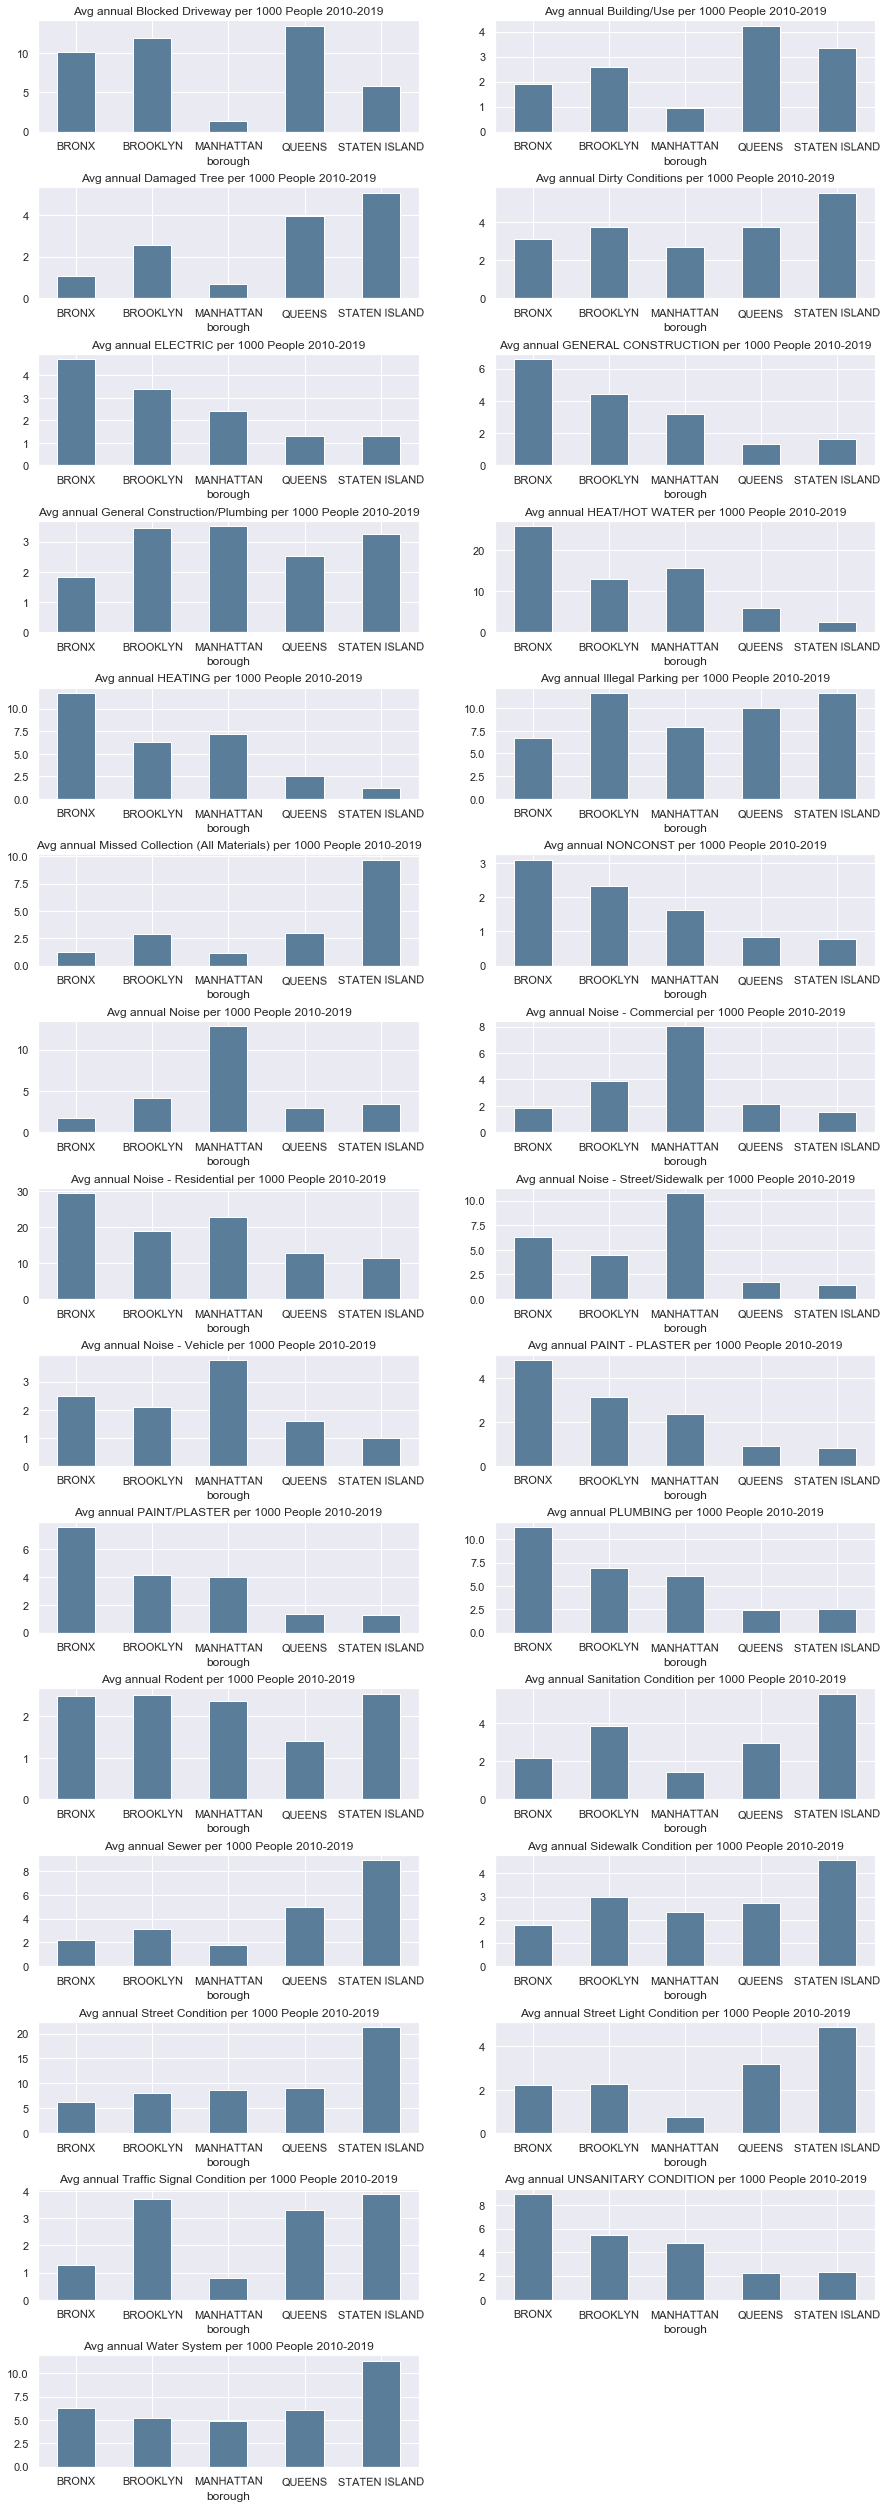

In [54]:
fig = plt.figure(figsize=(15,45))
plt.subplots_adjust(hspace=.5)

nrows = len(complaint_types) //2 +1 
ncols = 2

for i,t in enumerate(list(complaint_types)):
    ax = fig.add_subplot(nrows, ncols, i+1)
    avg_yrly_comptype_per_1k_by_boro.loc[t].plot(kind='bar', ax=ax, color='#5a7d9a')
    plt.title(f'Avg annual {t} per 1000 People 2010-2019')
    plt.xticks(rotation=.45)

# Response Times

In [55]:
df2.response_time.describe()

count    1.342149e+07
mean     1.110477e+01
std      5.894936e+01
min      1.157407e-05
25%      1.334259e-01
50%      1.180648e+00
75%      6.000000e+00
max      3.650499e+03
Name: response_time, dtype: float64

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


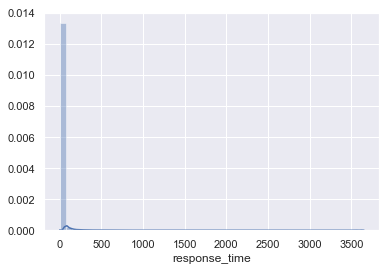

In [56]:
sns.distplot(df2.response_time);

## Mean & Median Response Times by Compliant Type

In [57]:
for c in complaint_types:
    mean_resp_time = round(df2[df2['complaint_type'] == c].response_time.mean(), 3)
    med_resp_time = round(df2[df2['complaint_type'] == c].response_time.median(), 3)
    
    print(f"The mean {c} response time is: {mean_resp_time} days")
    print(f"The median {c} response time is: {med_resp_time} days")
    print('----' * 6 )

The mean Blocked Driveway response time is: 0.226 days
The median Blocked Driveway response time is: 0.123 days
------------------------
The mean Building/Use response time is: 126.252 days
The median Building/Use response time is: 56.586 days
------------------------
The mean Damaged Tree response time is: 49.497 days
The median Damaged Tree response time is: 6.981 days
------------------------
The mean Dirty Conditions response time is: 4.535 days
The median Dirty Conditions response time is: 2.189 days
------------------------
The mean ELECTRIC response time is: 16.737 days
The median ELECTRIC response time is: 10.0 days
------------------------
The mean GENERAL CONSTRUCTION response time is: 13.807 days
The median GENERAL CONSTRUCTION response time is: 10.0 days
------------------------
The mean General Construction/Plumbing response time is: 76.767 days
The median General Construction/Plumbing response time is: 7.37 days
------------------------
The mean HEAT/HOT WATER response ti

In [58]:
# divide the number of reponses that took longer than a year by all 
len(df2[df2['response_time'] > 365]) / len(df2)

0.0040595331637446625

Less than half a percent of response times are longer than a year. Let's drop those and check our distributions again.

In [59]:
df2[df2['complaint_type'] == t].response_time.quantile(.95)

37.267951388888875

## Response Time Distributions

In [60]:
def plot_distributions(df, column, slice_values, variable='response_time'):

    for v in slice_values:
        fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
        fig.suptitle(f'{variable} distributions for {v}', fontsize=16)
        
        sns.distplot(df2[df2[column]==v][variable], ax=ax1)
        ax1.set_title('Total')
        
        sns.distplot(df2[(df2[column]==v) & (df2[variable] < 365)][variable], ax=ax2)
        ax2.set_title('< 1 year')
        
        quantile = df2[df2[column]==v][variable].quantile(.95)
        ax3 = sns.distplot(df2[(df2[column]==v) & (df2[variable] < quantile)][variable], ax=ax3)
        ax3.set_title('< 95th Quantile')
        
        plt.show()

### Response Time Distribution by Borough

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


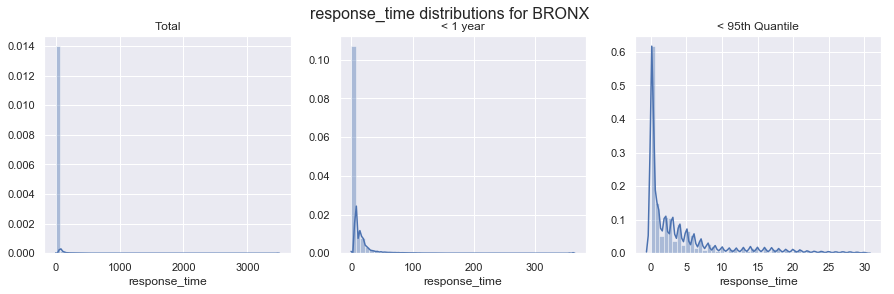

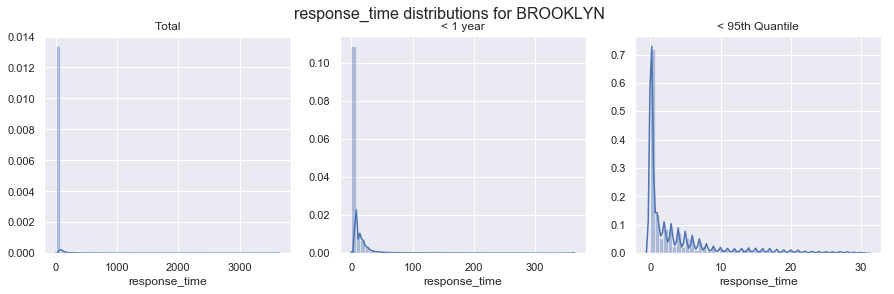

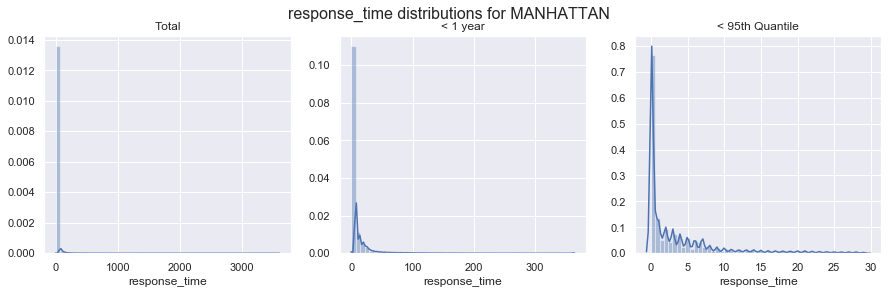

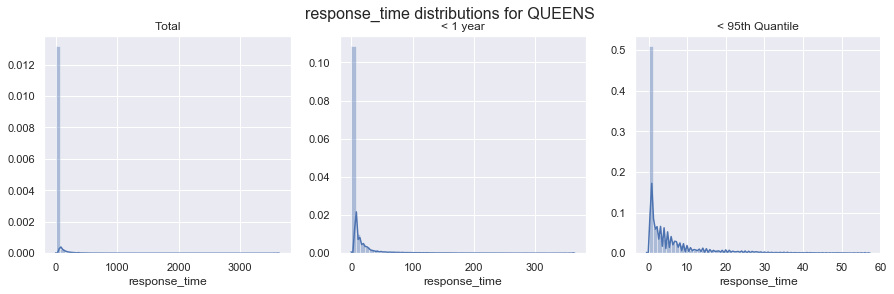

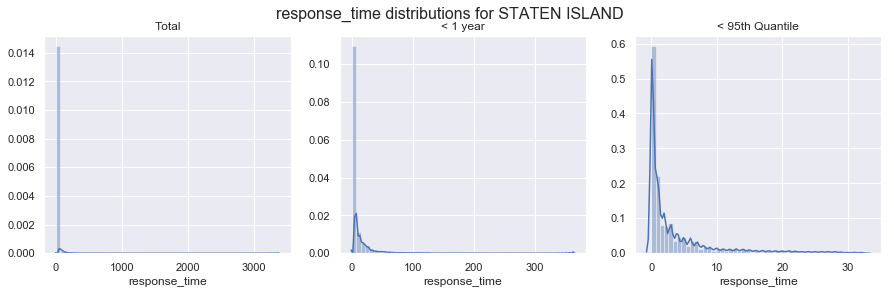

In [61]:
plot_distributions(df2, column='borough', slice_values=boroughs)

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


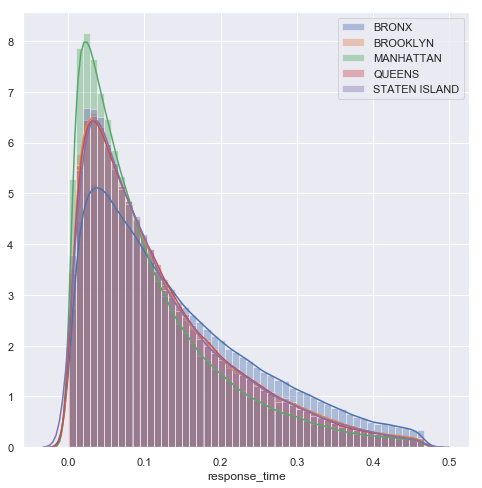

In [62]:
fig = plt.figure(figsize=(8,8))
for b in boroughs:
    quantile = df2[df2['complaint_type'] == 'Noise - Residential'].response_time.quantile(.95)
    data = df2[(df2['borough']==b)&
               (df2['complaint_type']=='Noise - Residential')&
               (df2['response_time']<quantile)].response_time
    sns.distplot(data)
    plt.legend(boroughs)

### Response Time Distribution by Agency

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


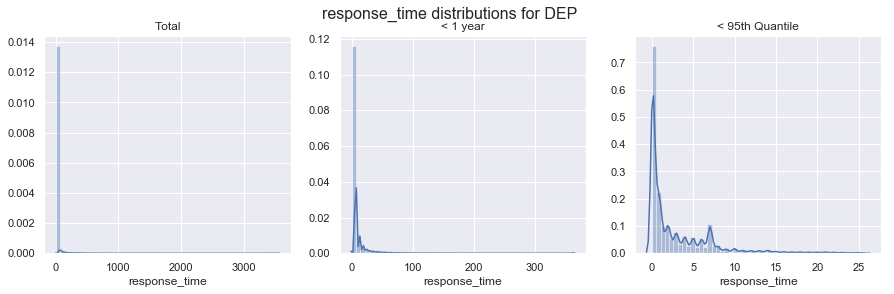

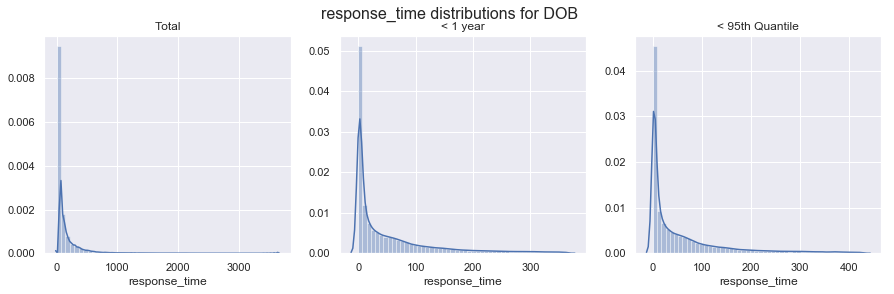

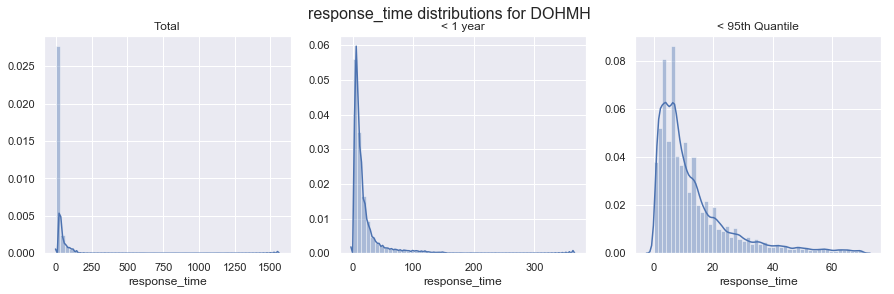

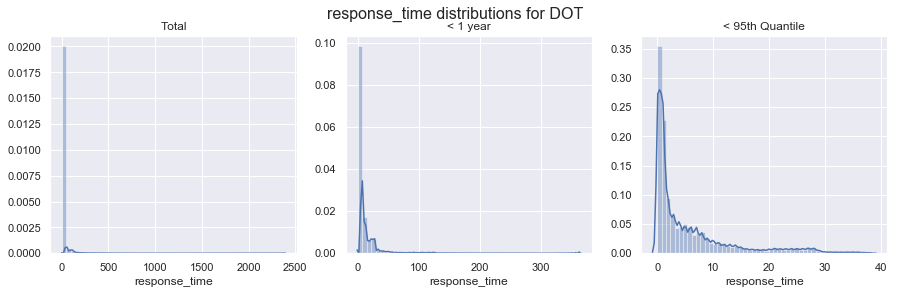

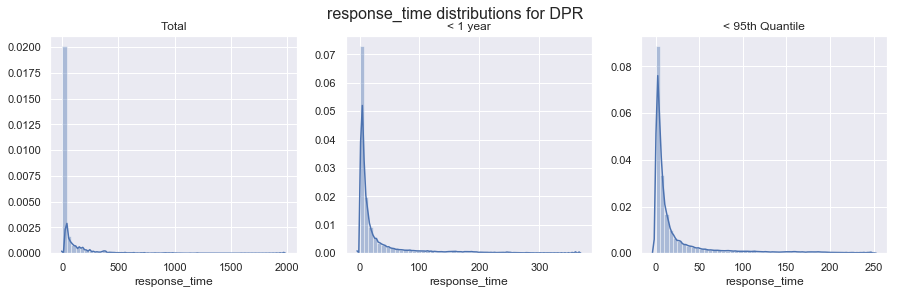

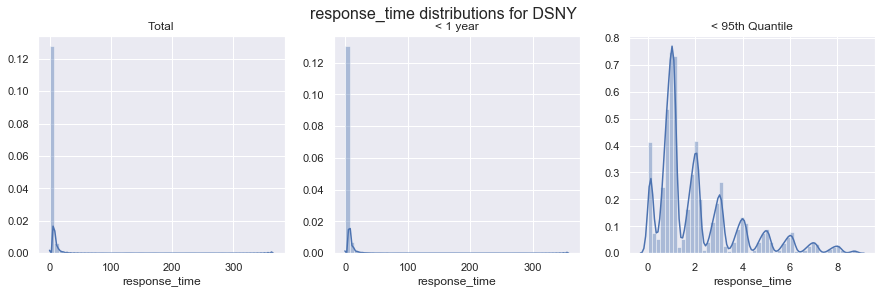

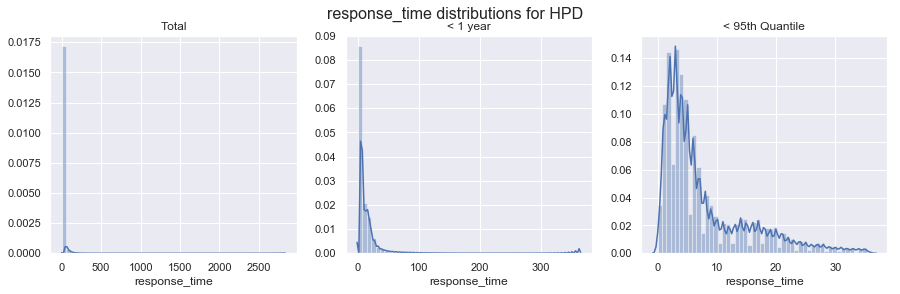

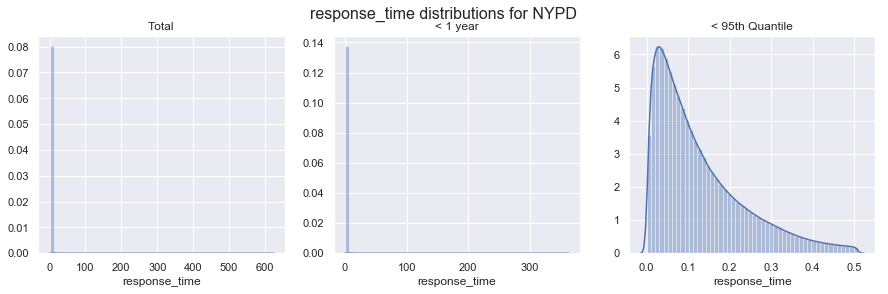

In [63]:
plot_distributions(df2, column='agency', slice_values=agencies)

### Response Time Distribution by Complaint Type

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


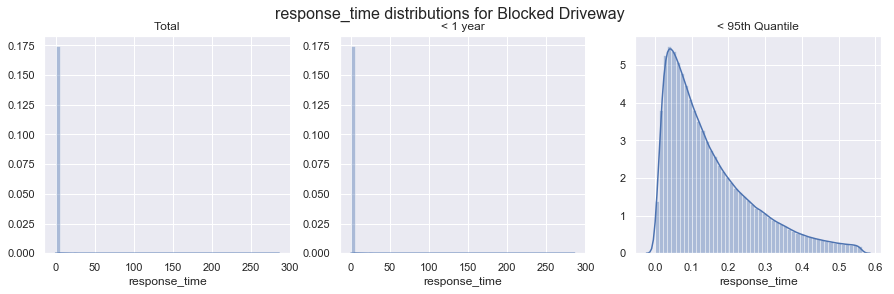

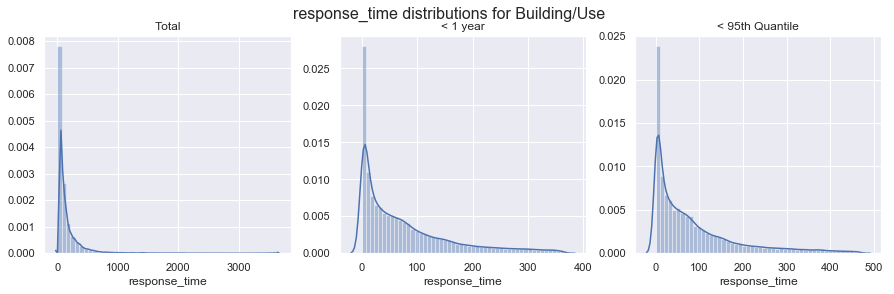

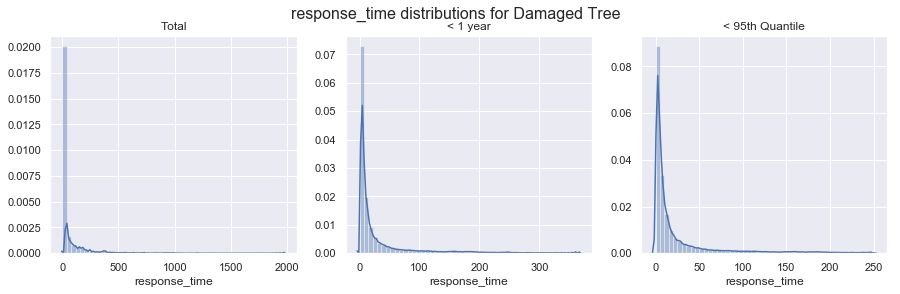

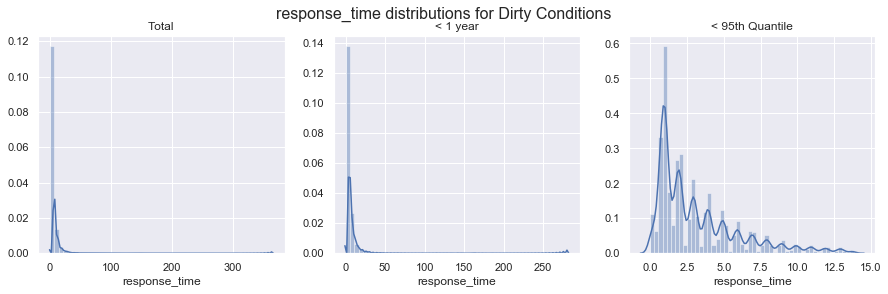

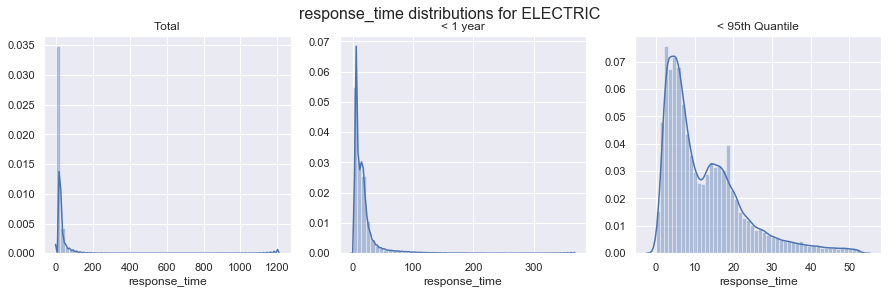

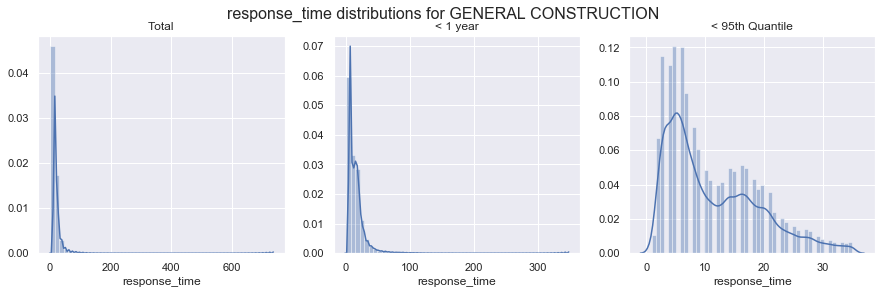

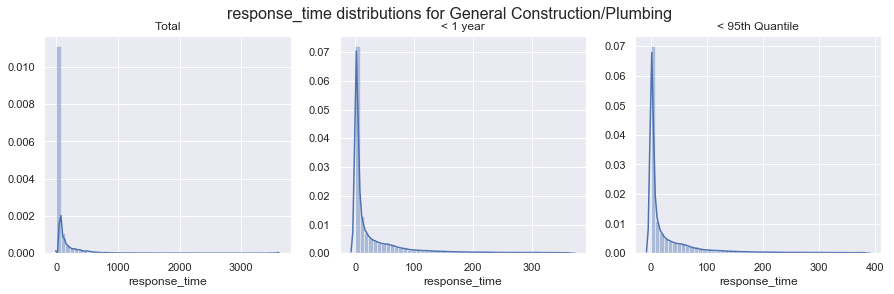

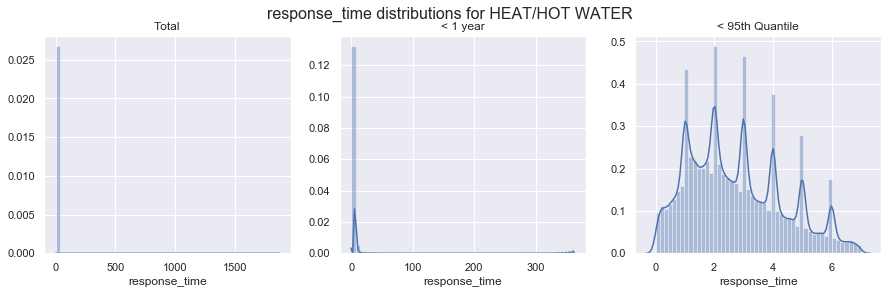

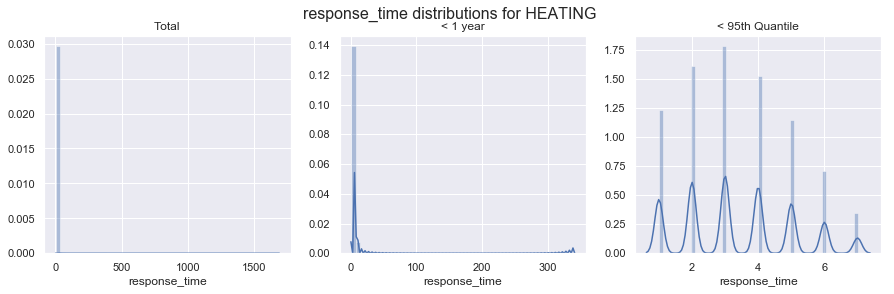

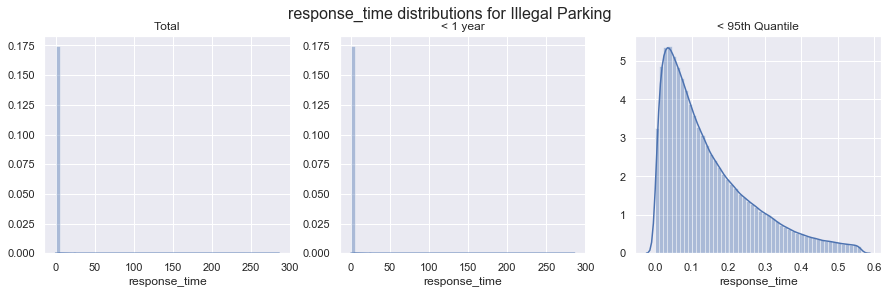

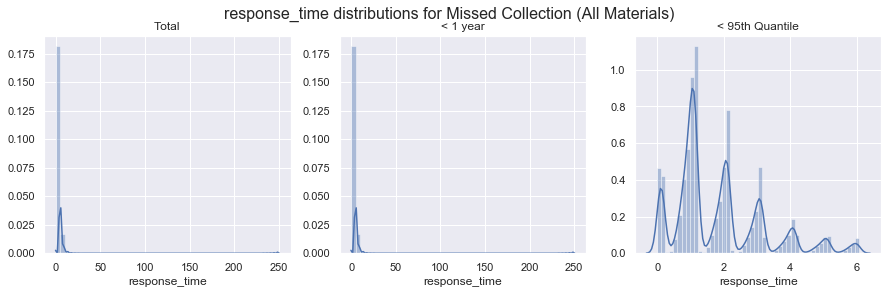

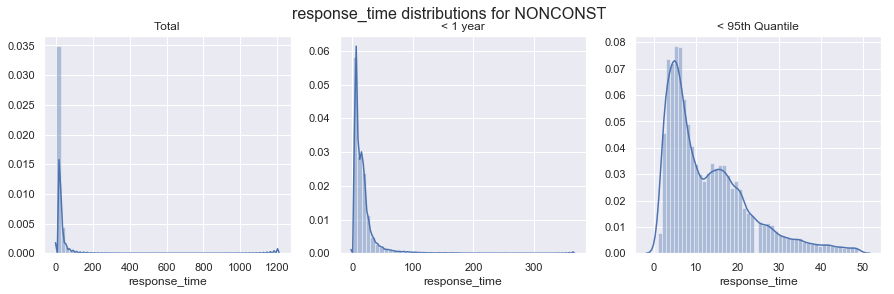

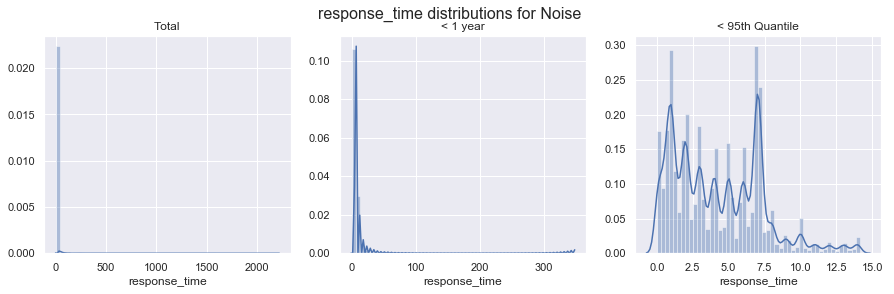

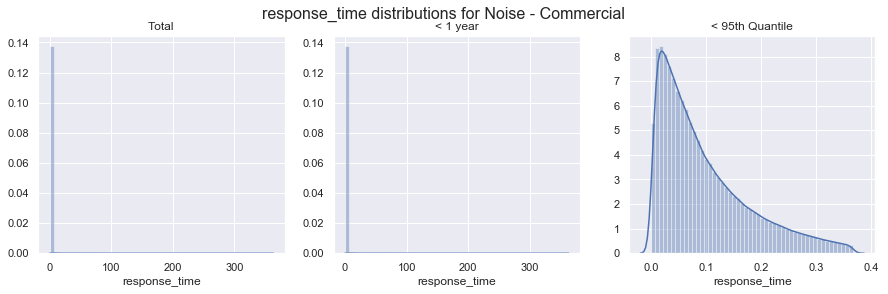

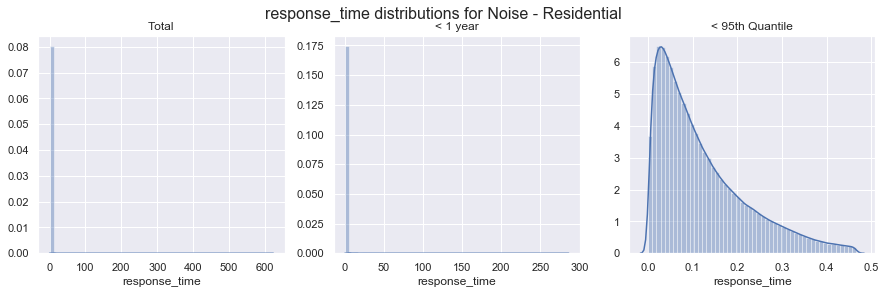

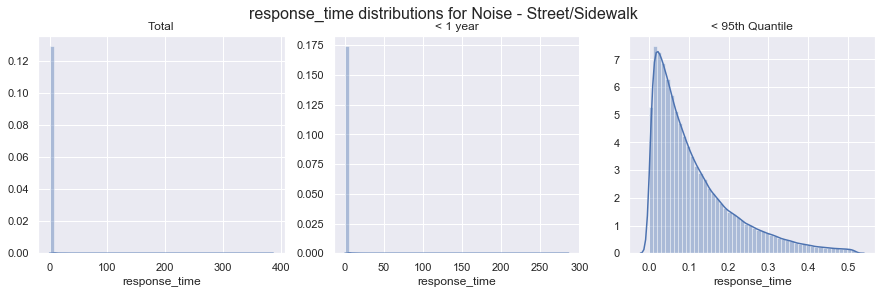

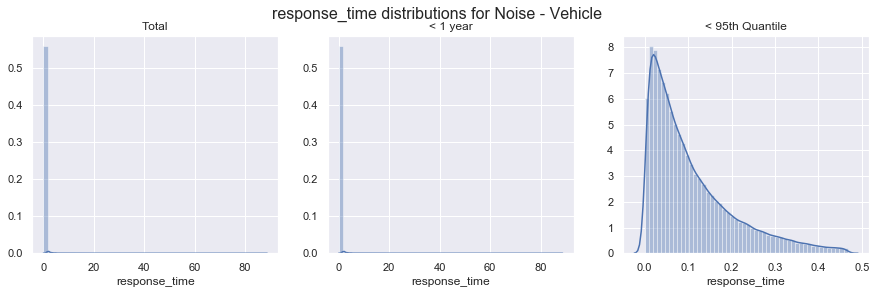

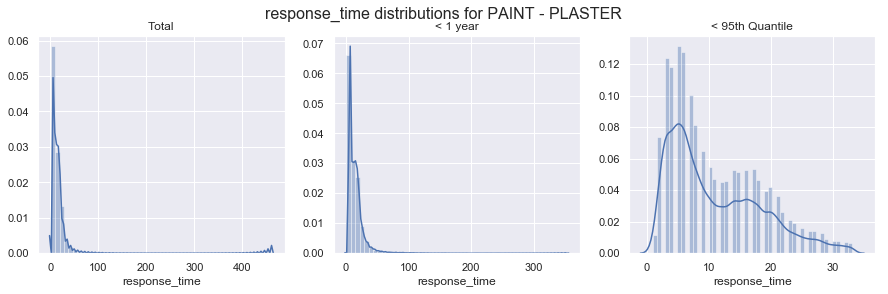

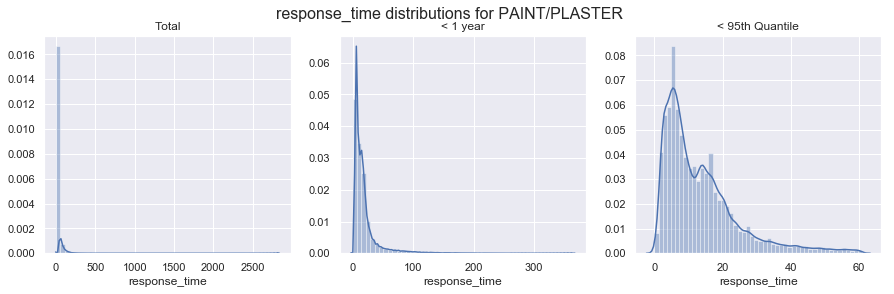

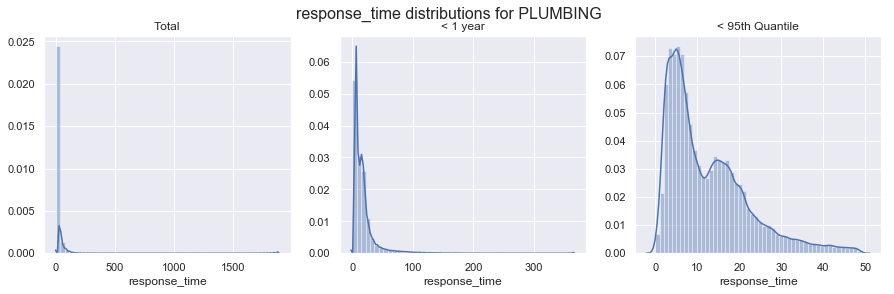

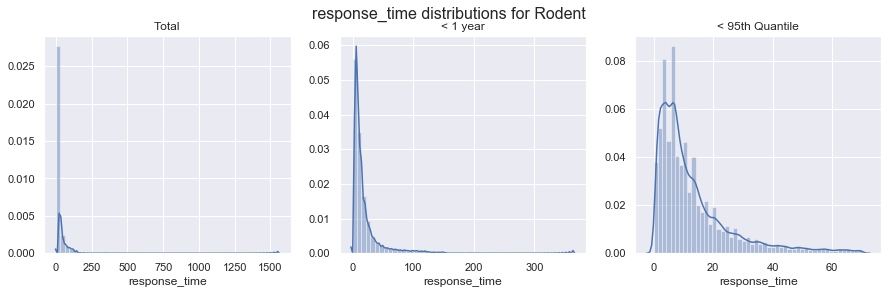

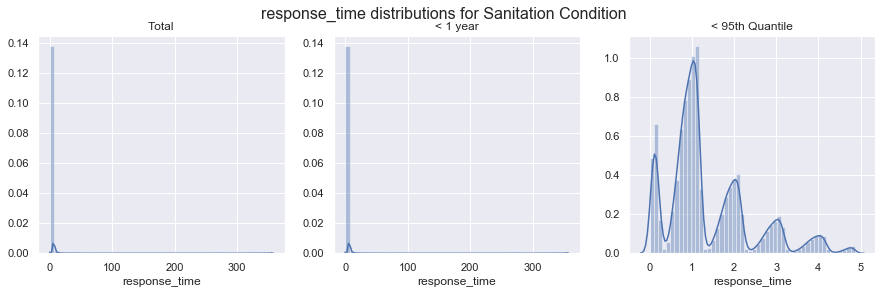

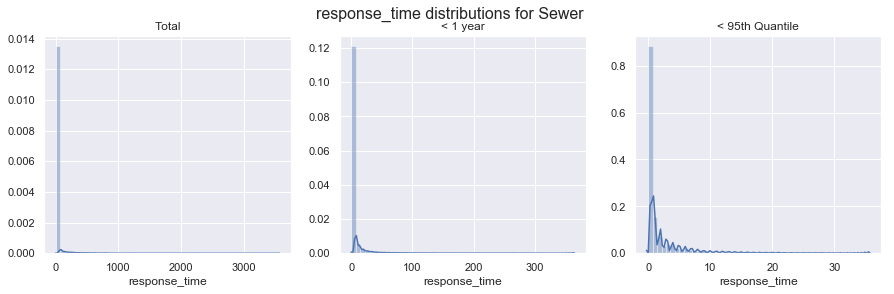

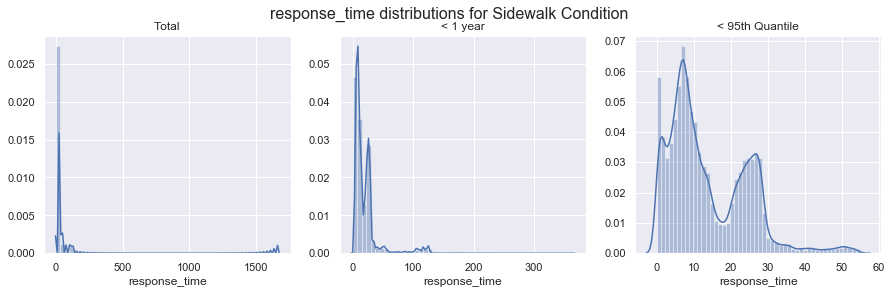

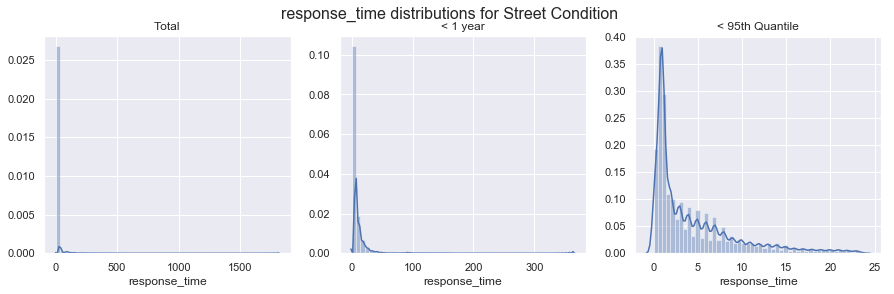

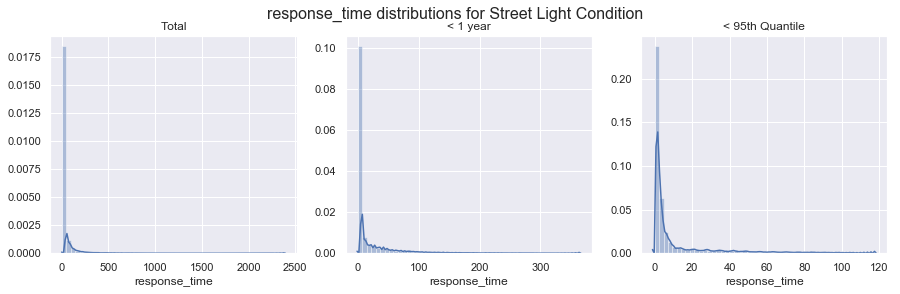

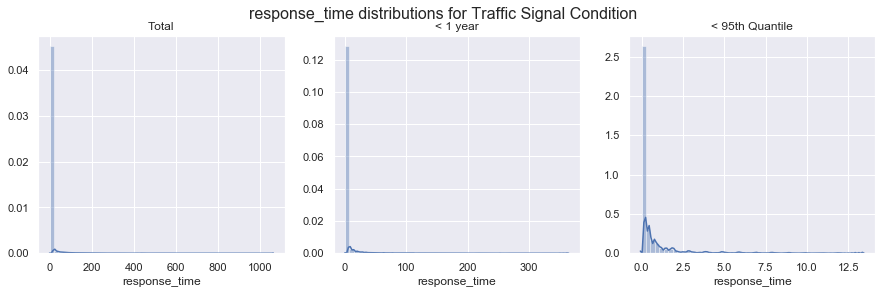

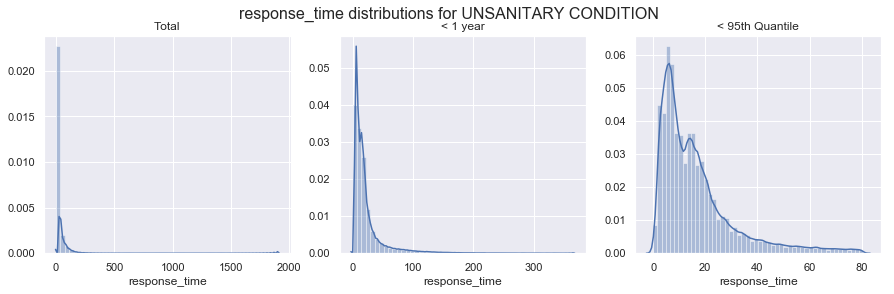

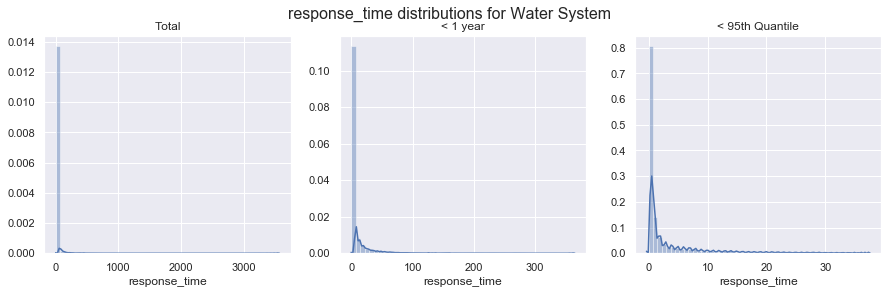

In [64]:
plot_distributions(df2, column='complaint_type', slice_values=complaint_types)

## Removing Response Time Outliers (start df3)

In [65]:
df3 = df2.copy()

In [66]:
df3 = df3[df3['response_time'] <=60]
df3.shape

(13005557, 30)

## Mean & Median Response time by Complaint & Borough

In [67]:
avg_resp_by_comp_boro = pd.pivot_table(df3,
                                       index=df3.complaint_type, 
                                       columns=df3.borough,
                                       values='response_time',
                                       aggfunc=['mean','median'])
avg_resp_by_comp_boro

mean                                   \
borough                                BRONX   BROOKLYN  MANHATTAN     QUEENS   
complaint_type                                                                  
Blocked Driveway                    0.304356   0.183025   0.169331   0.204693   
Building/Use                       22.775924  16.108480  20.831413  20.910704   
Damaged Tree                       11.373430  10.778839   8.104500   9.746459   
Dirty Conditions                    2.986066   4.906409   3.129950   4.447879   
ELECTRIC                           12.315713  12.097696  14.269830  14.311122   
GENERAL CONSTRUCTION               11.977588  10.961131  14.787802  16.322543   
General Construction/Plumbing      10.483257  10.335793   9.846524  10.862052   
HEAT/HOT WATER                      3.093384   2.840400   2.884750   3.787991   
HEATING                             3.258454   3.566382   3.774319   5.477121   
Illegal Parking                     0.311938   0.181185   0.165074   0.244930   
Missed Collection (All Materials)   1.716773   2.153755   1.419804   2.105636   
NONCONST                           12.238841  12.262011  15.964487  17.733698   
Noise                               4.842727   5.132544   5.483238   4.415042   
Noise - Commercial                  0.220074   0.120938   0.164381   0.172366   
Noise - Residential                 0.250142   0.177985   0.150627   0.153565   
Noise - Street/Sidewalk             0.315708   0.137613   0.177028   0.191707   
Noise - Vehicle                     0.300156   0.135361   0.168703   0.130647   
PAINT - PLASTER                    11.552353  10.933563  14.546525  15.383712   
PAINT/PLASTER                      13.014090  13.065657  14.229672  14.158519   
PLUMBING                           12.597977  12.134603  14.208901  14.910467   
Rodent                             10.909078  13.014251  12.439265  12.003814   
Sanitation Condition                1.530258   1.737126   1.208349   1.662243   
Sewer                               2.316019   2.077345   4.016947   2.987166   
Sidewalk Condition                 14.732980  14.189190  13.385965  13.798918   
Street Condition                    4.925769   6.139081   4.658581   4.994409   
Street Light Condition              5.933278   6.266200   7.468655   6.214802   
Traffic Signal Condition            0.953421   1.582385   0.783927   1.691735   
UNSANITARY CONDITION               14.527207  14.741646  15.972161  16.088537   
Water System                        3.823738   2.674925   2.867419   5.872279   

                                                    median             \
borough                           STATEN ISLAND      BRONX   BROOKLYN   
complaint_type                                                          
Blocked Driveway                       0.226217   0.156829   0.118218   
Building/Use                          20.748289  18.627523   6.599259   
Damaged Tree                           8.223217   5.083142   5.366979   
Dirty Conditions                       3.279969   1.873611   2.786806   
ELECTRIC                              12.355717   9.000000   9.000000   
GENERAL CONSTRUCTION                  12.084267   9.000000   8.000000   
General Construction/Plumbing         14.420442   3.403895   2.686250   
HEAT/HOT WATER                         3.707506   2.783021   2.245747   
HEATING                                3.901731   3.000000   3.000000   
Illegal Parking                        0.215101   0.173854   0.114583   
Missed Collection (All Materials)      2.728747   1.130556   1.691667   
NONCONST                              12.442695   9.000000   9.000000   
Noise                                  4.341841   3.113194   4.145139   
Noise - Commercial                     0.119365   0.113125   0.079352   
Noise - Residential                    0.152056   0.130104   0.095787   
Noise - Street/Sidewalk                0.131142   0.137894   0.086505   
Noise - Vehicle                        0.146373   0.133021  

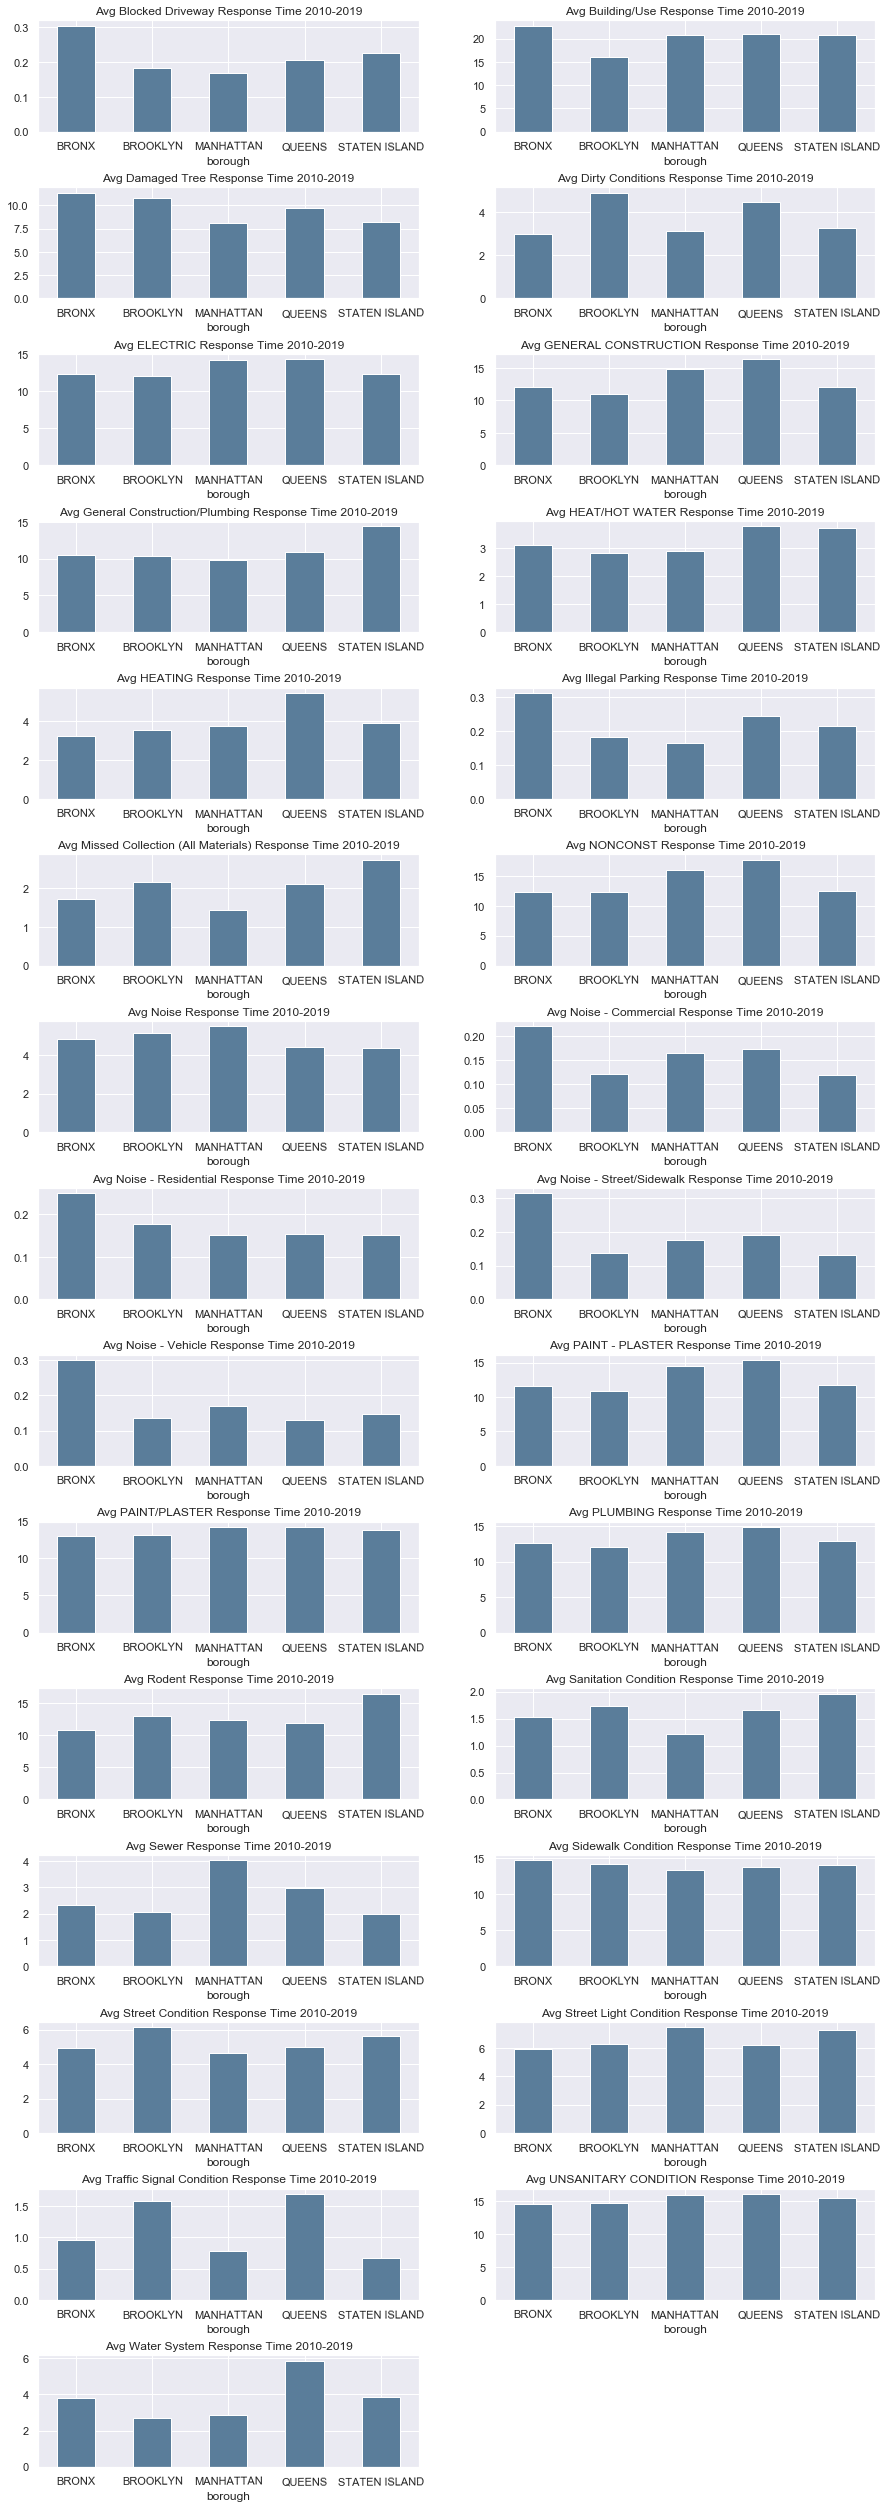

In [68]:
fig = plt.figure(figsize=(15,45))
plt.subplots_adjust(hspace=.5)

nrows = len(complaint_types) //2 +1 
ncols = 2

for i,t in enumerate(list(complaint_types)):
    ax = fig.add_subplot(nrows, ncols, i+1)
    avg_resp_by_comp_boro.loc[t]['mean'].plot(kind='bar', ax=ax, color='#5a7d9a')
    plt.title(f'Avg {t} Response Time 2010-2019')
    plt.xticks(rotation=.45)

In [69]:
df3.head(2)

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   

    borough open_data_channel_type                                 location  \
0  BROOKLYN                 MOBILE  (40.65087119116162, -73.93997156019773)   
1     BRONX                  PHONE  (40.85829772629949, -73.85445497857519)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   

   created_hr created_date_only  response_time  
0          23        2017-07-09       0.103681  
1          23        2017-07-09       0.351285

In [104]:
df_2018 = df3[df3['created_yr'] == 2018].copy()
df_2018.head()

created_date         closed_date agency       complaint_type  \
342207 2018-01-16 04:23:43 2018-01-16 07:26:31   NYPD   Noise - Commercial   
342325 2018-01-16 13:48:47 2018-01-16 17:15:42   NYPD   Noise - Commercial   
342344 2018-01-16 22:56:04 2018-01-17 00:09:45   NYPD   Noise - Commercial   
343532 2018-01-16 11:25:09 2018-01-16 12:32:44   NYPD  Noise - Residential   
344965 2018-01-16 19:39:41 2018-01-16 20:25:20   NYPD  Noise - Residential   

              descriptor               location_type  address_type  status  \
342207  Loud Music/Party         Club/Bar/Restaurant  INTERSECTION  Closed   
342325  Loud Music/Party            Store/Commercial       ADDRESS  Closed   
342344      Loud Talking            Store/Commercial       ADDRESS  Closed   
343532  Banging/Pounding  Residential Building/House       ADDRESS  Closed   
344965  Banging/Pounding  Residential Building/House       ADDRESS  Closed   

                                   resolution_description community_board  \
342207  The Police Department responded to the complai...        01 BRONX   
342325  The Police Department responded to the complai...       03 QUEENS   
342344  The Police Department responded to the complai...        09 BRONX   
343532  The Police Department responded to the complai...    02 MANHATTAN   
344965  The Police Department responded to the complai...     03 BROOKLYN   

          borough open_data_channel_type  \
342207      BRONX                 ONLINE   
342325     QUEENS                 MOBILE   
342344      BRONX                 ONLINE   
343532  MANHATTAN                UNKNOWN   
344965   BROOKLYN                  PHONE   

                                        location new_zip  total_population  \
342207    (40.81414393010289, -73.9191997410658)   10455             42283   
342325     (40.747851085397386, -73.88193375027)   11372             61844   
342344   (40.83036235589997, -73.86602154214397)   10472             68796   
343532  (40.732656236674664, -73.99727940253399)   10011             50472   
344965    (40.69298568613683, -73.9374274228241)   11221             83835   

        median_income  median_age  minority_rep  hs_or_above  bach_or_above  \
342207          17440        30.6      0.986685     0.550320       0.118335   
342325          30999        40.5      0.821777     0.696186       0.295106   
342344          17990        32.1      0.973908     0.556471       0.123313   
343532          83012        40.6      0.285247     0.924292       0.787937   
344965          27589        31.6      0.835474     0.728270       0.313018   

        poverty_rate  unemployment_rate  created_day_o_wk  created_month  \
342207      0.356686           0.126690                 1              1   
342325      0.120526           0.047305                 1              1   
342344      0.302477           0.110624                 1              1   
343532      0.106873           0.037161                 1              1   
344965      0.218556           0.100765                 1              1   

        created_day_o_yr  created_yr created_time  created_hr  \
342207                16        2018     04:23:43           4   
342325                16        2018     13:48:47          13   
342344                16        2018     22:56:04          22   
343532                16        2018     11:25:09          11   
344965                16        2018     19:39:41          19   

       created_date_only  response_time  
342207        2018-01-16       0.126944  
342325        2018-01-16       0.143692  
342344        2018-01-16       0.051169  
343532        2018-01-16       0.046933  
344965        2018-01-16       0.031701

In [105]:
df_2018.borough = df_2018.borough.astype('category')
df_2018.complaint_type = df_2018.complaint_type.astype('category')

# Demographic Groups

In [ ]:
df_2018['income_groups'] = pd.cut()

# Correlation

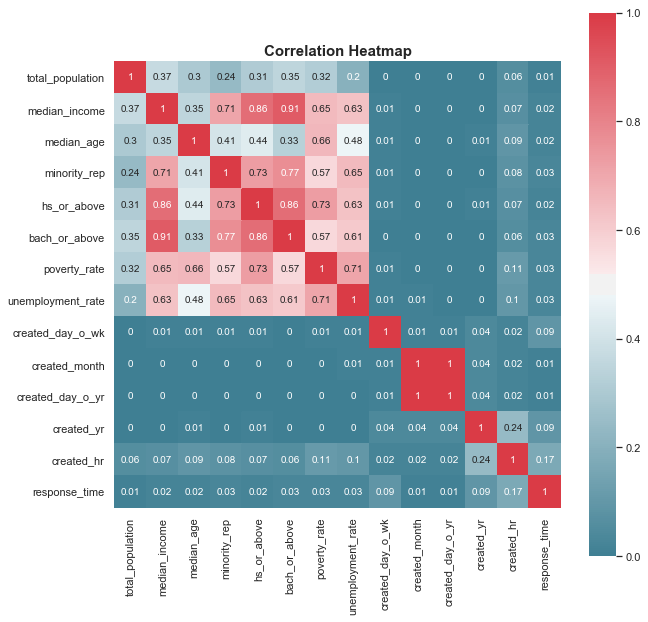

In [72]:
# plot a heatmap of correlations
correlation = abs(round(df3.corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

# Storage

In [108]:
df3.to_csv('data/post_eda_data.csv')

In [109]:
sr_vol_by_zip = pd.pivot_table(df3,
                               values='created_date', 
                               index='new_zip',
                               columns='complaint_type',
                               aggfunc=len)
sr_vol_by_zip.head()

complaint_type  Blocked Driveway  Building/Use  Damaged Tree  \
new_zip                                                        
10001                      928.0         259.0         103.0   
10002                     1070.0         580.0         341.0   
10003                      687.0         329.0         470.0   
10004                       82.0          22.0          14.0   
10005                       69.0          20.0          19.0   

complaint_type  Dirty Conditions  ELECTRIC  GENERAL CONSTRUCTION  \
new_zip                                                            
10001                     1354.0     282.0                 290.0   
10002                     1912.0    1077.0                1017.0   
10003                     1919.0     795.0                 994.0   
10004                      112.0      21.0                  11.0   
10005                      137.0      11.0                  27.0   

complaint_type  General Construction/Plumbing  HEAT/HOT WATER  HEATING  \
new_zip                                                                  
10001                                  1997.0          2233.0    996.0   
10002                                  2125.0          8886.0   3486.0   
10003                                  2432.0          6450.0   2980.0   
10004                                   166.0            53.0     81.0   
10005                                   183.0            61.0    113.0   

complaint_type  Illegal Parking  Missed Collection (All Materials)  NONCONST  \
new_zip                                                                        
10001                    3658.0                              621.0     270.0   
10002                    7910.0                              503.0     624.0   
10003                    4541.0                             1090.0     527.0   
10004                    1339.0                               44.0      10.0   
10005                    1010.0                               45.0       7.0   

complaint_type    Noise  Noise - Commercial  Noise - Residential  \
new_zip                                                            
10001            9565.0              2752.0               6719.0   
10002            7832.0             11693.0              19113.0   
10003           11385.0              7949.0              10976.0   
10004            1946.0               225.0                242.0   
10005            2932.0               355.0                619.0   

complaint_type  Noise - Street/Sidewalk  Noise - Vehicle  PAINT - PLASTER  \
new_zip                                                                     
10001                            3240.0            880.0            170.0   
10002                            6147.0           2675.0            738.0   
10003                            5703.0           1870.0            805.0   
10004                             439.0            242.0              6.0   
10005                            1216.0            381.0              5.0   

complaint_type  PAINT/PLASTER  PLUMBING  Rodent  Sanitation Condition   Sewer  \
new_zip                                                                         
10001                   361.0     706.0   667.0                1009.0   918.0   
10002                  1468.0    2408.0  1647.0                1442.0  1195.0   
10003                  1183.0    1989.0  1165.0                1117.0  1381.0   
10004                    11.0      21.0    87.0                 104.0   281.0   
10005                     5.0      30.0    61.0                  85.0   160.0   

complaint_type  Sidewalk Condition  Street Condition  Street Light Condition  \
new_zip                                                                        
10001                       1217.0            4644.0                    67.0   
10002                       1911.0            5705.0                  1429.0   
10003                       1706.0            6879.0                   258.0   
10004    

In [110]:
sr_vol_by_zip.to_csv('data/sr_vol_by_zip.csv')

# Grave Yard

In [73]:
# df2 = pd.get_dummies(df, prefix=['cmplnt_typ'], columns=['complaint_type'])
# df2.head()

In [74]:
# complaint_type_columns = list(df2.columns[30:])
# complaint_type_columns

In [75]:
# daily_calls_by_yr = df2.groupby(['created_yr','created_day_o_yr'])[complaint_type_columns].agg('sum')

In [76]:
# test = df.groupby(['created_date_only','complaint_type']).agg('count')['created_date']

# fig, ax = plt.subplots(figsize=(14,10))

# ax = test.unstack().plot(ax=ax)
# plt.legend()

In [77]:
# pv = pd.pivot_table(df, index=df.created_day_o_yr, columns=df.created_yr, 
#                     values='created_date', aggfunc=len)
# pv

In [78]:
# fig, ax = plt.subplots(figsize=(14,10))
# pv.plot(ax=ax)

In [79]:
# pv = pd.pivot_table(df, index=df.created_month, columns=df.created_yr, 
#                     values='created_date', aggfunc=len)

# fig, ax = plt.subplots(figsize=(14,10))
# pv.plot(ax=ax)

In [80]:
# daily_calls_by_yr['total'] = daily_calls_by_yr.sum(axis=1)

# daily_calls_by_yr.head()

In [81]:
# daily_calls_by_yr.describe()

In [82]:
# for b in boroughs:
#     fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#     fig.suptitle(f'Response Time Distributions for {b}')
#     sns.distplot(df2[df2['borough']==b].response_time, ax=ax1)
#     ax2 = sns.distplot(df2[(df2['borough']==b) & (df2['response_time'] < 365)].response_time, ax=ax2)
#     quantile = df2[df2['borough']==b].response_time.quantile(.95)
#     ax3 = sns.distplot(df2[(df2['borough']==b) & (df2['response_time'] < quantile)].response_time, ax=ax3)
#     plt.show()

In [83]:
# df.created_yr.dtype

In [84]:
# avg_response_by_complaint = df.groupby('complaint_type').response_time.agg(['mean'])
# avg_response_by_complaint = avg_response_by_complaint.sort_values(by=['mean'],
#                                                                   ascending=False)

In [85]:
# ax = plt.figure(figsize=(10,15))
# ax = sns.barplot(y=avg_response_by_complaint.index, x='mean', 
#                  data=avg_response_by_complaint,
#                  color='blue')

In [86]:
# df.groupby('complaint_type').response_time.agg(['min', 'max', 'mean'])

In [87]:
# complaint_stats = {}

# # add the daily average number of complaints to a dataframe
# for col in complaint_type_columns:
#     complaint_stats[col] = round(daily_calls_by_yr[col].mean(),1)
    
# complaint_stats


In [88]:
# list(complaint_stats.values())

In [89]:
# df.groupby('complaint_type').complaint_type.agg('value_counts')

In [90]:
# df3 = pd.DataFrame({'complaint_type': list(complaint_stats.keys()), 'avg_calls_day':list(complaint_stats.values())})
# df3.complaint_type = df3.complaint_type.str[11:]
# df3 = df3.merge(df.groupby('complaint_type').response_time.agg(['mean']), 
#                 on='complaint_type')
# df3 = df3.merge(df.complaint_type.value_counts(),
#                 on='complaint_type')
# df3.rename(columns={'mean':'avg_response_time'}, inplace=True)

# df3

In [91]:
# ax = plt.figure(figsize=(12,12))
# ax = sns.scatterplot(x='avg_calls_day', y='avg_response_time', hue='complaint_type', data=df3)

In [92]:
# df.groupby('complaint_type').response_time.agg(['count', 'mean'])

In [93]:
# df.open_data_channel_type.value_counts(dropna=False)

In [94]:
# print(df[df['complaint_type'] == 'Noise - Residential'].descriptor.value_counts())


In [95]:
# for a in agencies:
#     print(a,': ')
#     print(df[df['agency'] == a].complaint_type.value_counts())
#     print('----' * 10)

In [96]:
# for a in agencies:
#     print(a,': ')
#     print(df[df['agency'] == a].location_type.value_counts(dropna=False))
#     print('----' * 10, '\n')

In [97]:
# df.status.value_counts(dropna=False)

In [98]:
# df.open_data_channel_type.value_counts(dropna=False)

In [99]:
# df.location_type.value_counts(dropna=False)